In [1]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 2 for only showing errors
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

2023-08-11 03:33:30.348654: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [2]:
dataset = pd.read_csv('Monthly_dataset_1.csv')
dataset.head()

,date,Yield,Area Harvested,Aug_prcp (mm),Jul_prcp (mm),Jun_prcp (mm),Sep_prcp (mm),aug_srad (W/m^2),jul_srad (W/m^2),jun_srad (W/m^2),...,jun_tmax (deg c),sep_tmax (deg c),aug_tmin (deg c),jul_tmin (deg c),jun_tmin (deg c),sep_tmin (deg c),aug_vp (Pa),jul_vp (Pa),jun_vp (Pa),sep_vp (Pa)
0,1980-12-31,23252,46390,82.6500,171.1225,97.833621,115.510714,351.994677,360.596048,404.417155,...,21.366552,21.596786,17.206855,15.639113,10.389483,11.532857,1979.333145,1808.963226,1298.384655,1412.074107
1,1981-12-31,23729,47356,95.4500,99.4425,136.272321,155.394828,333.959032,382.391129,376.206250,...,23.856161,19.732069,15.243790,15.842097,13.606429,11.800603,1758.285161,1829.448387,1578.962411,1464.165517
2,1982-12-31,22526,31166,85.6100,40.2000,141.897321,121.150862,362.746210,403.382339,370.001429,...,20.529196,20.184483,13.044113,15.768629,11.623571,10.479310,1545.176694,1819.913710,1383.133750,1301.157500
3,1983-12-31,23689,47159,112.7850,145.5375,65.292857,57.318103,352.762177,361.725726,424.604911,...,25.187589,22.393707,16.415484,16.610242,12.973839,11.948017,1893.806129,1937.883629,1529.818036,1469.525690
4,1984-12-31,21995,40645,89.8275,63.4925,122.322414,122.657143,344.606129,395.069758,389.616638,...,24.401983,19.778750,15.984839,14.366613,13.719741,10.763571,1858.868710,1662.393145,1600.213879,1345.276250


In [3]:
filtered_dataset = dataset.drop(['date'], axis=1)
correlation = filtered_dataset.corr()['Yield']
correlation

Yield               1.000000
Area Harvested     -0.730960
Aug_prcp (mm)      -0.339383
Jul_prcp (mm)      -0.069072
Jun_prcp (mm)      -0.111142
Sep_prcp (mm)      -0.093480
aug_srad (W/m^2)    0.268034
jul_srad (W/m^2)   -0.116643
jun_srad (W/m^2)   -0.170323
sep_srad (W/m^2)    0.458451
aug_tmax (deg c)    0.279663
jul_tmax (deg c)    0.120419
jun_tmax (deg c)    0.296197
sep_tmax (deg c)    0.600611
aug_tmin (deg c)    0.200930
jul_tmin (deg c)    0.271524
jun_tmin (deg c)    0.476035
sep_tmin (deg c)    0.369980
aug_vp (Pa)         0.116737
jul_vp (Pa)         0.318075
jun_vp (Pa)         0.407391
sep_vp (Pa)         0.291852
Name: Yield, dtype: float64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

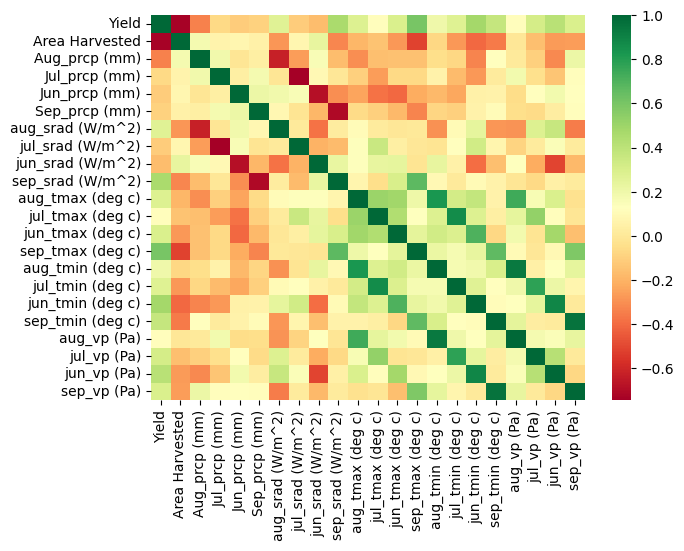

In [5]:
correlation = filtered_dataset.corr()
_, ax = plt.subplots(figsize = (7,5))
_ = sns.heatmap(correlation, ax = ax, cmap = 'RdYlGn', annot = False, fmt = '.1f', annot_kws={"size": 4})

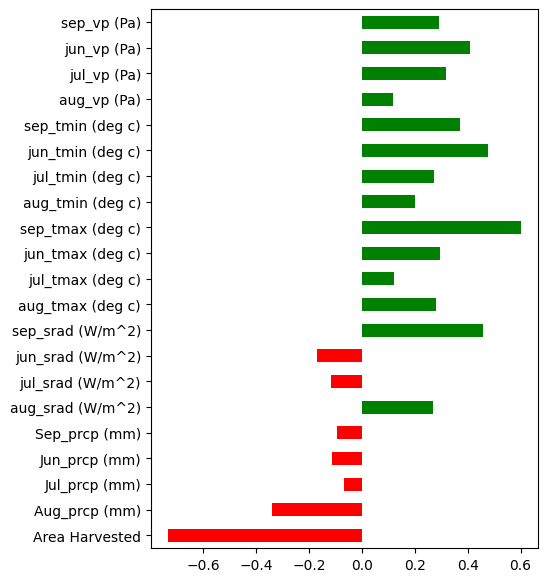

In [6]:
# Correlations
df_corr1 = correlation['Yield'][1:]
list1 = ['green' if x > 0 else 'red' for x in df_corr1]
_ = df_corr1.plot(kind = 'barh', figsize = (5,7), color = list1)

In [7]:
# data = dataset.drop(['Area Harvested'], axis=1)
data = dataset.copy()
data.set_index('date', inplace=True)
data

,Yield,Area Harvested,Aug_prcp (mm),Jul_prcp (mm),Jun_prcp (mm),Sep_prcp (mm),aug_srad (W/m^2),jul_srad (W/m^2),jun_srad (W/m^2),sep_srad (W/m^2),...,jun_tmax (deg c),sep_tmax (deg c),aug_tmin (deg c),jul_tmin (deg c),jun_tmin (deg c),sep_tmin (deg c),aug_vp (Pa),jul_vp (Pa),jun_vp (Pa),sep_vp (Pa)
date,,,,,,,,,,,,,,,,,,,,,
1980-12-31,23252,46390,82.6500,171.1225,97.833621,115.510714,351.994677,360.596048,404.417155,324.127411,...,21.366552,21.596786,17.206855,15.639113,10.389483,11.532857,1979.333145,1808.963226,1298.384655,1412.074107
1981-12-31,23729,47356,95.4500,99.4425,136.272321,155.394828,333.959032,382.391129,376.206250,279.627672,...,23.856161,19.732069,15.243790,15.842097,13.606429,11.800603,1758.285161,1829.448387,1578.962411,1464.165517
1982-12-31,22526,31166,85.6100,40.2000,141.897321,121.150862,362.746210,403.382339,370.001429,288.811983,...,20.529196,20.184483,13.044113,15.768629,11.623571,10.479310,1545.176694,1819.913710,1383.133750,1301.157500
1983-12-31,23689,47159,112.7850,145.5375,65.292857,57.318103,352.762177,361.725726,424.604911,325.372328,...,25.187589,22.393707,16.415484,16.610242,12.973839,11.948017,1893.806129,1937.883629,1529.818036,1469.525690
1984-12-31,21995,40645,89.8275,63.4925,122.322414,122.657143,344.606129,395.069758,389.616638,289.276964,...,24.401983,19.778750,15.984839,14.366613,13.719741,10.763571,1858.868710,1662.393145,1600.213879,1345.276250
1985-12-31,24233,39893,137.6650,76.4275,89.038393,72.561207,341.573548,380.927339,388.413393,319.423707,...,21.334821,22.175431,14.565726,14.818629,10.869554,12.151983,1680.862823,1702.412742,1315.523571,1505.815862
1986-12-31,21572,31298,89.1100,92.7700,98.488393,145.184483,374.865323,369.249677,382.647143,281.891379,...,22.706786,20.469828,13.266694,15.639113,11.972500,10.701983,1577.116048,1810.908226,1436.593839,1344.715259
1987-12-31,20781,29540,119.9275,37.8700,75.500893,70.189655,338.485323,394.473952,375.051071,298.444397,...,25.355357,20.836983,14.686935,17.340000,13.757411,11.718362,1694.318065,1744.795081,1503.840179,1412.375776
1988-12-31,20024,29136,85.7525,172.4800,6.069828,99.875893,341.538145,363.779597,441.621810,294.688661,...,25.293276,20.721429,16.553548,16.354516,11.424483,11.145536,1953.216694,1635.605081,1214.303621,1371.143482


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_Y = MinMaxScaler(feature_range=(0,1))

backup_data = data.copy()

new_data = data.copy()
print(data.shape)

scaled_data = scaler.fit_transform(data)
y_data = np.array(data['Yield']).reshape(-1,1)
print("Y_data shape:",y_data.shape)
scaled_Y = scaler_Y.fit_transform(y_data)
print(scaled_data[0])

(42, 22)
Y_data shape: (42, 1)
[0.36075101 0.97442347 0.47851554 0.79563772 0.45344409 0.39066297
 0.35205212 0.39025107 0.61360867 0.66042394 0.61095266 0.44057186
 0.11330377 0.41239219 0.90846372 0.41595281 0.         0.47290633
 0.88795328 0.61405869 0.14273304 0.4508109 ]


In [10]:
# Step 3: Create a sequence of data by shifting the data by one time step.
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        print(i+1,"th iteration")
        print("X:",data[i:(i + n_steps),:1])
        print('Y:',data[i + n_steps,:1])
        print()
        X.append(data[i:(i + n_steps),:])
        y.append(data[i + n_steps,:1])
    return np.array(X), np.array(y)

time_steps = 5 # Define the number of time steps in the sequence
sequence_data = scaled_data
X, y = create_sequences(scaled_data, time_steps)

# def create_sequences(data, timesteps):
#     X_train = []
#     Y_train = []

#     timesteps = timesteps
#     n_future  = 1
#     train = data

#     for i in range(timesteps,len(train)-n_future +1):
#         X_train.append(train[i-timesteps:i, 0:train.shape[1]])
#         Y_train.append(train[i + n_future - 1:i + n_future,0])

#     X = np.array(X_train.copy())
#     y = np.array(Y_train.copy())
    
#     return X,y

print(X.shape)
print(y.shape)

1 th iteration
X: [[0.36075101]
 [0.41405901]
 [0.27961556]
 [0.40958873]
 [0.22027269]]
Y: [0.47038444]

2 th iteration
X: [[0.41405901]
 [0.27961556]
 [0.40958873]
 [0.22027269]
 [0.47038444]]
Y: [0.17299955]

3 th iteration
X: [[0.27961556]
 [0.40958873]
 [0.22027269]
 [0.47038444]
 [0.17299955]]
Y: [0.08459991]

4 th iteration
X: [[0.40958873]
 [0.22027269]
 [0.47038444]
 [0.17299955]
 [0.08459991]]
Y: [0.]

5 th iteration
X: [[0.22027269]
 [0.47038444]
 [0.17299955]
 [0.08459991]
 [0.        ]]
Y: [0.52223961]

6 th iteration
X: [[0.47038444]
 [0.17299955]
 [0.08459991]
 [0.        ]
 [0.52223961]]
Y: [0.16383549]

7 th iteration
X: [[0.17299955]
 [0.08459991]
 [0.        ]
 [0.52223961]
 [0.16383549]]
Y: [0.65802414]

8 th iteration
X: [[0.08459991]
 [0.        ]
 [0.52223961]
 [0.16383549]
 [0.65802414]]
Y: [0.51464014]

9 th iteration
X: [[0.        ]
 [0.52223961]
 [0.16383549]
 [0.65802414]
 [0.51464014]]
Y: [0.51363433]

10 th iteration
X: [[0.52223961]
 [0.16383549]
 [0.658

In [11]:
y[0]

array([0.47038444])

In [12]:
scaled_data[5,0]

0.4703844434510507

## Model LSTM/

In [13]:
import keras
import keras.backend as K

def r2_Keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from keras.callbacks import *
from keras.layers import *
from keras.models import *

In [15]:
# from itertools import product

# best_score = float('inf')
# # # best_score = -9999
# # best_hyperparameters = {}

# # Step 3: Create a sequence of data by shifting the data by one time step.
# def create_sequences(data, n_steps):
#     X, y = [], []
#     for i in range(len(data) - n_steps):
#         X.append(data[i:(i + n_steps),:])
#         y.append(data[i + n_steps,:1])
#     return np.array(X), np.array(y)

# def create_model_lstm(x, y, unitsconv, unitslstm, unitsdense , activate, optime, lr, loss, batch, epoch):
    
#     # Model 8
#     model2 = Sequential()
#     model2.add(LSTM(unitsconv, activation=activate, input_shape=x.shape[1:], return_sequences=True))
#     model2.add(GRU(unitslstm, activation=activate))
#     model2.add(Flatten())
#     model2.add(Dense(unitsdense,activation=activate))
#     model2.add(Dense(1, activation='linear'))
    
#     print("\n\n")
#     model2.summary()
#     print("\n")    
#     def r2_Keras(y_true, y_pred):
#         SS_res =  K.sum(K.square( y_true-y_pred ))
#         SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
#         return ( 1 - SS_res/(SS_tot + K.epsilon()) )
    
#     model2.compile(optimizer = optime(lr), loss=loss, metrics=[r2_Keras, 'mape'])    
    
#     batch = int(batch)
#     epoch = int(epoch)
#     callback = ModelCheckpoint(filepath='Models/checkpoint/Model8_checkpoint.hdf5',
#                               monitor='r2_Keras', mode='max', save_best_only=True, save_weights_only=True,
#                               verbose=False)
    
#     history = model2.fit(x, y,
#                        batch_size = batch,
#                        epochs = epoch,
#                        verbose = 0,
#                         callbacks=[callback],
#                        shuffle = False)
    
#     return model2, history

# # Define hyperparameter search space
# # models = [model1(), model2(), model3()]
# timesteps = [5] #TimeSteps for Data
# unitsconv_list = [16, 32, 64, 128]
# unitslstm_list = [32, 64, 128] # Number of LSTM Units
# unitsdense_list = [16, 32, 64] # Number of Dense units
# activate_list = ['relu', 'selu'] # Activation Function
# batch_size_list = [4, 8, 16] # Batch Size
# learning_rate_list = [0.005, 0.001, 0.0005, 0.0001] # Learning Rate
# optimizer_list = [keras.optimizers.Adamax] # Optimizer 
# loss_list = ['mse'] # Loss Function
# epoch_list = [80, 100]

# Full_list = product(timesteps, unitsconv_list, unitslstm_list, unitsdense_list, activate_list, batch_size_list, learning_rate_list, optimizer_list, loss_list, epoch_list)
# print("Iterations :",len(list(Full_list)))
# X_train, X_test, y_train, y_test = 0,0,0,0

# # Iterate through all combinations of hyperparameters
# for steps, convi, i, j, k, l, m, n, o, p in product(timesteps, unitsconv_list, unitslstm_list, unitsdense_list, activate_list, batch_size_list, learning_rate_list, optimizer_list, loss_list, epoch_list):
#     X, y = create_sequences(scaled_data, steps)
#     X_train = X[:-9]
#     y_train = y[:-9]
#     X_test = X[-9:]
#     y_test = y[-9:]
    
#     print(steps, convi, i, j, k, l, m, n, o, p)
#     model3, history = create_model_lstm(x=X_train, y=y_train, unitsconv=convi, unitslstm=i, unitsdense=j, activate=k, batch=l, lr=m, optime=n, loss=o, epoch=p)    
    
    
    
#     model3.load_weights("Models/checkpoint/Model8_checkpoint.hdf5")
#     y_pred1 = model3.predict(X_test)
#     y_pred2 = scaler_Y.inverse_transform(y_pred1.reshape(-1, 1))
#     y_true1 = y_test
#     y_true2 = scaler_Y.inverse_transform(y_true1.reshape(-1, 1))
#     score = mean_absolute_percentage_error(y_pred=y_pred2, y_true=y_true2)
#     print("Fit Complete for:", steps, convi, i, j, k, l, m, n, o, p)
#     print("\n\nCurrent Score:", score)
    
#     # Update best hyperparameters if the current score is better
#     if score < best_score:
#         best_score = score
#         best_hyperparameters = {"TimeSteps":steps, "unitsconv":convi, 'unitslstm': i, 'unitsdense': j, 'activate': k, 'batch': l, 'Optimizer': n, 'learning_rate': m, 'lossFunction': o, 'Epochs':p}
#         print("\n\nNew Best Score:", score, "Hyperparameters:", (steps, convi, i, j, k, l, m, n, o, p))
#         model3.save('Models/Model8.hdf5')
#         model3.save_weights("Models/Model8_weights.hdf5")

# print("\n\nBest Hyperparameters:", best_hyperparameters)
# print("Best Score:", best_score)


Iterations : 1728
5 16 32 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 16)             2496      
                                                                 
 gru (GRU)                   (None, 32)                4800      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 7,841
Trainable params: 7,841
Non-trainable params: 0
____________________

 gru_5 (GRU)                 (None, 32)                4800      
                                                                 
 flatten_5 (Flatten)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7,841
Trainable params: 7,841
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 158ms/step
Fit Complete for: 5 16 32 16 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.028827772300615475
5 16 32 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_6"
_________________________________________



1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 16 32 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.030309280579646745
5 16 32 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 5, 16)             2496      
                                                                 
 gru_11 (GRU)                (None, 32)                4800      
                                                                 
 flatten_11 (Flatten)        (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)      

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 5, 16)             2496      
                                                                 
 gru_17 (GRU)                (None, 32)                4800      
                                                                 
 flatten_17 (Flatten)        (None, 32)                0         
                                                                 
 dense_34 (Dense)            (None, 16)                528       
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7,841
Trainable params: 7,841
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5

 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 5, 16)             2496      
                                                                 
 gru_23 (GRU)                (None, 32)                4800      
                                                                 
 flatten_23 (Flatten)        (None, 32)                0         
                                                                 
 dense_46 (Dense)            (None, 16)                528       
                                                                 
 dense_47 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7,841
Trainable params: 7,841
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 16 32 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Ad

 lstm_29 (LSTM)              (None, 5, 16)             2496      
                                                                 
 gru_29 (GRU)                (None, 32)                4800      
                                                                 
 flatten_29 (Flatten)        (None, 32)                0         
                                                                 
 dense_58 (Dense)            (None, 16)                528       
                                                                 
 dense_59 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7,841
Trainable params: 7,841
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 155ms/step
Fit Complete for: 5 16 32 16 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04368134063020279
5 16 32 16 selu

 lstm_35 (LSTM)              (None, 5, 16)             2496      
                                                                 
 gru_35 (GRU)                (None, 32)                4800      
                                                                 
 flatten_35 (Flatten)        (None, 32)                0         
                                                                 
 dense_70 (Dense)            (None, 16)                528       
                                                                 
 dense_71 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7,841
Trainable params: 7,841
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 16 32 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.01511957152913531
5 16 32 16 selu 

 lstm_41 (LSTM)              (None, 5, 16)             2496      
                                                                 
 gru_41 (GRU)                (None, 32)                4800      
                                                                 
 flatten_41 (Flatten)        (None, 32)                0         
                                                                 
 dense_82 (Dense)            (None, 16)                528       
                                                                 
 dense_83 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7,841
Trainable params: 7,841
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 16 32 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03535560167118342
5 16 32 16 selu

                                                                 
 gru_47 (GRU)                (None, 32)                4800      
                                                                 
 flatten_47 (Flatten)        (None, 32)                0         
                                                                 
 dense_94 (Dense)            (None, 16)                528       
                                                                 
 dense_95 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7,841
Trainable params: 7,841
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 16 32 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03814507689806979
5 16 32 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



                                                                 
 flatten_53 (Flatten)        (None, 32)                0         
                                                                 
 dense_106 (Dense)           (None, 32)                1056      
                                                                 
 dense_107 (Dense)           (None, 1)                 33        
                                                                 
Total params: 8,385
Trainable params: 8,385
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 16 32 32 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04378903294450616
5 16 32 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape

                                                                 
 dense_118 (Dense)           (None, 32)                1056      
                                                                 
 dense_119 (Dense)           (None, 1)                 33        
                                                                 
Total params: 8,385
Trainable params: 8,385
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 16 32 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02215815532432413
5 16 32 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 5, 16)             2496      
                                          

 dense_130 (Dense)           (None, 32)                1056      
                                                                 
 dense_131 (Dense)           (None, 1)                 33        
                                                                 
Total params: 8,385
Trainable params: 8,385
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 156ms/step
Fit Complete for: 5 16 32 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.031795686567876146
5 16 32 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_66 (LSTM)              (None, 5, 16)             2496      
                                                                 
 gru_66 (GRU)                (None, 32) 

                                                                 
 dense_143 (Dense)           (None, 1)                 33        
                                                                 
Total params: 8,385
Trainable params: 8,385
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 16 32 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.09079993755449012
5 16 32 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_72 (LSTM)              (None, 5, 16)             2496      
                                                                 
 gru_72 (GRU)                (None, 32)                4800      
                                         

                                                                 
Total params: 8,385
Trainable params: 8,385
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 16 32 32 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.033126419851691416
5 16 32 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_78 (LSTM)              (None, 5, 16)             2496      
                                                                 
 gru_78 (GRU)                (None, 32)                4800      
                                                                 
 flatten_78 (Flatten)        (None, 32)                0         
                                        

Total params: 8,385
Trainable params: 8,385
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 16 32 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.045606482110952265
5 16 32 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_84 (LSTM)              (None, 5, 16)             2496      
                                                                 
 gru_84 (GRU)                (None, 32)                4800      
                                                                 
 flatten_84 (Flatten)        (None, 32)                0         
                                                                 
 dense_168 (Dense)           (None, 32)  

_________________________________________________________________


1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 16 32 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.018328436117472882
5 16 32 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_90 (LSTM)              (None, 5, 16)             2496      
                                                                 
 gru_90 (GRU)                (None, 32)                4800      
                                                                 
 flatten_90 (Flatten)        (None, 32)                0         
                                                                 
 dense_180 (Dense)           (None, 32)                1056      
                                          



1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 16 32 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.0664148569329467
5 16 32 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_96 (LSTM)              (None, 5, 16)             2496      
                                                                 
 gru_96 (GRU)                (None, 32)                4800      
                                                                 
 flatten_96 (Flatten)        (None, 32)                0         
                                                                 
 dense_192 (Dense)           (None, 64)                2112      
                                                                 
 dense_193 (Dense)           (None, 1)      

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_102 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_102 (GRU)               (None, 32)                4800      
                                                                 
 flatten_102 (Flatten)       (None, 32)                0         
                                                                 
 dense_204 (Dense)           (None, 64)                2112      
                                                                 
 dense_205 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5

 Layer (type)                Output Shape              Param #   
 lstm_108 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_108 (GRU)               (None, 32)                4800      
                                                                 
 flatten_108 (Flatten)       (None, 32)                0         
                                                                 
 dense_216 (Dense)           (None, 64)                2112      
                                                                 
 dense_217 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 200ms/step
Fit Complete for: 5 16 32 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Ada

 lstm_114 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_114 (GRU)               (None, 32)                4800      
                                                                 
 flatten_114 (Flatten)       (None, 32)                0         
                                                                 
 dense_228 (Dense)           (None, 64)                2112      
                                                                 
 dense_229 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 16 32 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.046228564120029035
5 16 32 64 relu

 lstm_120 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_120 (GRU)               (None, 32)                4800      
                                                                 
 flatten_120 (Flatten)       (None, 32)                0         
                                                                 
 dense_240 (Dense)           (None, 64)                2112      
                                                                 
 dense_241 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 16 32 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02874694606909188
5 16 32 64 selu 4

                                                                 
 gru_126 (GRU)               (None, 32)                4800      
                                                                 
 flatten_126 (Flatten)       (None, 32)                0         
                                                                 
 dense_252 (Dense)           (None, 64)                2112      
                                                                 
 dense_253 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 16 32 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.033336139849071224
5 16 32 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


 gru_132 (GRU)               (None, 32)                4800      
                                                                 
 flatten_132 (Flatten)       (None, 32)                0         
                                                                 
 dense_264 (Dense)           (None, 64)                2112      
                                                                 
 dense_265 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 16 32 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.036681874437194256
5 16 32 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_133"
_______________________________________

                                                                 
 flatten_138 (Flatten)       (None, 32)                0         
                                                                 
 dense_276 (Dense)           (None, 64)                2112      
                                                                 
 dense_277 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 16 32 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.024630128891952242
5 16 32 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_139"
_________________________________________________________________
 Layer (type)                Output Sha

 flatten_144 (Flatten)       (None, 64)                0         
                                                                 
 dense_288 (Dense)           (None, 16)                1040      
                                                                 
 dense_289 (Dense)           (None, 1)                 17        
                                                                 
Total params: 19,297
Trainable params: 19,297
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 16 64 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04215407089806896
5 16 64 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_145"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_145 (LSTM)             (None, 5, 1

                                                                 
 dense_300 (Dense)           (None, 16)                1040      
                                                                 
 dense_301 (Dense)           (None, 1)                 17        
                                                                 
Total params: 19,297
Trainable params: 19,297
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 16 64 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.101038274140547
5 16 64 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_151"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_151 (LSTM)             (None, 5, 16)             2496      
                                        

 dense_312 (Dense)           (None, 16)                1040      
                                                                 
 dense_313 (Dense)           (None, 1)                 17        
                                                                 
Total params: 19,297
Trainable params: 19,297
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 195ms/step
Fit Complete for: 5 16 64 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.022819124635882627
5 16 64 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_157"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_157 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_157 (GRU)               (None, 6

                                                                 
 dense_325 (Dense)           (None, 1)                 17        
                                                                 
Total params: 19,297
Trainable params: 19,297
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 16 64 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.048937648745371765
5 16 64 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_163"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_163 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_163 (GRU)               (None, 64)                15744     
                                     

 dense_337 (Dense)           (None, 1)                 17        
                                                                 
Total params: 19,297
Trainable params: 19,297
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 16 64 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.0431641989950723
5 16 64 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_169"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_169 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_169 (GRU)               (None, 64)                15744     
                                                                 
 flatten_169 (Flatten)       (None, 64)  

                                                                 
Total params: 19,297
Trainable params: 19,297
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 16 64 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.0455825484316203
5 16 64 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_175"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_175 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_175 (GRU)               (None, 64)                15744     
                                                                 
 flatten_175 (Flatten)       (None, 64)                0         
                                       

Total params: 19,297
Trainable params: 19,297
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 16 64 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.030937126218189732
5 16 64 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_181"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_181 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_181 (GRU)               (None, 64)                15744     
                                                                 
 flatten_181 (Flatten)       (None, 64)                0         
                                                                 
 dense_362 (Dense)           (None, 1

Total params: 19,297
Trainable params: 19,297
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 16 64 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02946704188420887
5 16 64 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_187"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_187 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_187 (GRU)               (None, 64)                15744     
                                                                 
 flatten_187 (Flatten)       (None, 64)                0         
                                                                 
 dense_374 (Dense)           (None, 16

Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 16 64 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.020536802652064288
5 16 64 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_193"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_193 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_193 (GRU)               (None, 64)                15744     
                                                                 
 flatten_193 (Flatten)       (None, 64)                0         
                                                                 
 dense_386 (Dense)           (None, 32)                2080      
                   



1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 16 64 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.06282503973989499
5 16 64 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_199"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_199 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_199 (GRU)               (None, 64)                15744     
                                                                 
 flatten_199 (Flatten)       (None, 64)                0         
                                                                 
 dense_398 (Dense)           (None, 32)                2080      
                                                                 
 dense_399 (Dense)           (None, 1)    

Fit Complete for: 5 16 64 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02115814587051516
5 16 64 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_205"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_205 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_205 (GRU)               (None, 64)                15744     
                                                                 
 flatten_205 (Flatten)       (None, 64)                0         
                                                                 
 dense_410 (Dense)           (None, 32)                2080      
                                                                 
 dense_411 (Dense)           (None, 1)                 33        
                               

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_211 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_211 (GRU)               (None, 64)                15744     
                                                                 
 flatten_211 (Flatten)       (None, 64)                0         
                                                                 
 dense_422 (Dense)           (None, 32)                2080      
                                                                 
 dense_423 (Dense)           (None, 1)                 33        
                                                                 
Total params: 20,353
Trainable params: 20,353
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 lstm_217 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_217 (GRU)               (None, 64)                15744     
                                                                 
 flatten_217 (Flatten)       (None, 64)                0         
                                                                 
 dense_434 (Dense)           (None, 32)                2080      
                                                                 
 dense_435 (Dense)           (None, 1)                 33        
                                                                 
Total params: 20,353
Trainable params: 20,353
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 156ms/step
Fit Complete for: 5 16 64 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Ad

 lstm_223 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_223 (GRU)               (None, 64)                15744     
                                                                 
 flatten_223 (Flatten)       (None, 64)                0         
                                                                 
 dense_446 (Dense)           (None, 32)                2080      
                                                                 
 dense_447 (Dense)           (None, 1)                 33        
                                                                 
Total params: 20,353
Trainable params: 20,353
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 16 64 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.012566374246166497
5 16 64 32 s

 lstm_229 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_229 (GRU)               (None, 64)                15744     
                                                                 
 flatten_229 (Flatten)       (None, 64)                0         
                                                                 
 dense_458 (Dense)           (None, 32)                2080      
                                                                 
 dense_459 (Dense)           (None, 1)                 33        
                                                                 
Total params: 20,353
Trainable params: 20,353
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 199ms/step
Fit Complete for: 5 16 64 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.024142046258461346
5 16 64 32 s

                                                                 
 gru_235 (GRU)               (None, 64)                15744     
                                                                 
 flatten_235 (Flatten)       (None, 64)                0         
                                                                 
 dense_470 (Dense)           (None, 32)                2080      
                                                                 
 dense_471 (Dense)           (None, 1)                 33        
                                                                 
Total params: 20,353
Trainable params: 20,353
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 16 64 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.023842772217334534
5 16 64 32 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 

 gru_241 (GRU)               (None, 64)                15744     
                                                                 
 flatten_241 (Flatten)       (None, 64)                0         
                                                                 
 dense_482 (Dense)           (None, 64)                4160      
                                                                 
 dense_483 (Dense)           (None, 1)                 65        
                                                                 
Total params: 22,465
Trainable params: 22,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 16 64 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.032734921925342705
5 16 64 64 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_242"
_______________________________________

                                                                 
 flatten_247 (Flatten)       (None, 64)                0         
                                                                 
 dense_494 (Dense)           (None, 64)                4160      
                                                                 
 dense_495 (Dense)           (None, 1)                 65        
                                                                 
Total params: 22,465
Trainable params: 22,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 16 64 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.07301523157029256
5 16 64 64 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_248"
_________________________________________________________________
 Layer (type)                Output Sha

 flatten_253 (Flatten)       (None, 64)                0         
                                                                 
 dense_506 (Dense)           (None, 64)                4160      
                                                                 
 dense_507 (Dense)           (None, 1)                 65        
                                                                 
Total params: 22,465
Trainable params: 22,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 201ms/step
Fit Complete for: 5 16 64 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.022651987713460157
5 16 64 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_254"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_254 (LSTM)             (None, 5

                                                                 
 dense_518 (Dense)           (None, 64)                4160      
                                                                 
 dense_519 (Dense)           (None, 1)                 65        
                                                                 
Total params: 22,465
Trainable params: 22,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 16 64 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.037639689636128605
5 16 64 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_260"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_260 (LSTM)             (None, 5, 16)             2496      
                                    

 dense_530 (Dense)           (None, 64)                4160      
                                                                 
 dense_531 (Dense)           (None, 1)                 65        
                                                                 
Total params: 22,465
Trainable params: 22,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 16 64 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.01478327912455107
5 16 64 64 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_266"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_266 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_266 (GRU)               (None, 64) 

                                                                 
 dense_542 (Dense)           (None, 64)                4160      
                                                                 
 dense_543 (Dense)           (None, 1)                 65        
                                                                 
Total params: 22,465
Trainable params: 22,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 16 64 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.020779115506254924
5 16 64 64 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_272"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_272 (LSTM)             (None, 5, 16)             2496      
                                      

 dense_554 (Dense)           (None, 64)                4160      
                                                                 
 dense_555 (Dense)           (None, 1)                 65        
                                                                 
Total params: 22,465
Trainable params: 22,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 16 64 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.016403532445610308
5 16 64 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_278"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_278 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_278 (GRU)               (None, 6

                                                                 
 dense_567 (Dense)           (None, 1)                 65        
                                                                 
Total params: 22,465
Trainable params: 22,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 211ms/step
Fit Complete for: 5 16 64 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02161931331653037
5 16 64 64 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_284"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_284 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_284 (GRU)               (None, 64)                15744     
                                     

 dense_579 (Dense)           (None, 1)                 17        
                                                                 
Total params: 60,641
Trainable params: 60,641
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 16 128 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.030352790489524353
5 16 128 16 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_290"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_290 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_290 (GRU)               (None, 128)               56064     
                                                                 
 flatten_290 (Flatten)       (None, 1

                                                                 
Total params: 60,641
Trainable params: 60,641
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 16 128 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.07889304474669596
5 16 128 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_296"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_296 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_296 (GRU)               (None, 128)               56064     
                                                                 
 flatten_296 (Flatten)       (None, 128)               0         
                                     

Total params: 60,641
Trainable params: 60,641
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 16 128 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.024233643019410257
5 16 128 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_302"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_302 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_302 (GRU)               (None, 128)               56064     
                                                                 
 flatten_302 (Flatten)       (None, 128)               0         
                                                                 
 dense_604 (Dense)           (None,

Total params: 60,641
Trainable params: 60,641
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 155ms/step
Fit Complete for: 5 16 128 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.023189388870464636
5 16 128 16 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_308"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_308 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_308 (GRU)               (None, 128)               56064     
                                                                 
 flatten_308 (Flatten)       (None, 128)               0         
                                                                 
 dense_616 (Dense)           (None

Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 196ms/step
Fit Complete for: 5 16 128 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.05484149208855557
5 16 128 16 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_314"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_314 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_314 (GRU)               (None, 128)               56064     
                                                                 
 flatten_314 (Flatten)       (None, 128)               0         
                                                                 
 dense_628 (Dense)           (None, 16)                2064      
                  



1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 16 128 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.039394092877604925
5 16 128 16 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_320"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_320 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_320 (GRU)               (None, 128)               56064     
                                                                 
 flatten_320 (Flatten)       (None, 128)               0         
                                                                 
 dense_640 (Dense)           (None, 16)                2064      
                                                                 
 dense_641 (Dense)           (None, 1)  

1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 16 128 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.0494363585920498
5 16 128 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_326"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_326 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_326 (GRU)               (None, 128)               56064     
                                                                 
 flatten_326 (Flatten)       (None, 128)               0         
                                                                 
 dense_652 (Dense)           (None, 16)                2064      
                                                                 
 dense_653 (Dense)           (None, 1)     

1/1 [==============================] - 0s 159ms/step
Fit Complete for: 5 16 128 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04481934592196251
5 16 128 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_332"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_332 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_332 (GRU)               (None, 128)               56064     
                                                                 
 flatten_332 (Flatten)       (None, 128)               0         
                                                                 
 dense_664 (Dense)           (None, 16)                2064      
                                                                 
 dense_665 (Dense)           (None, 1)   

1/1 [==============================] - 0s 212ms/step
Fit Complete for: 5 16 128 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03385425184602347
5 16 128 32 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_338"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_338 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_338 (GRU)               (None, 128)               56064     
                                                                 
 flatten_338 (Flatten)       (None, 128)               0         
                                                                 
 dense_676 (Dense)           (None, 32)                4128      
                                                                 
 dense_677 (Dense)           (None, 1)      

1/1 [==============================] - 0s 207ms/step
Fit Complete for: 5 16 128 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.05729242355179683
5 16 128 32 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_344"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_344 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_344 (GRU)               (None, 128)               56064     
                                                                 
 flatten_344 (Flatten)       (None, 128)               0         
                                                                 
 dense_688 (Dense)           (None, 32)                4128      
                                                                 
 dense_689 (Dense)           (None, 1)     

1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 16 128 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.05114160666367392
5 16 128 32 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_350"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_350 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_350 (GRU)               (None, 128)               56064     
                                                                 
 flatten_350 (Flatten)       (None, 128)               0         
                                                                 
 dense_700 (Dense)           (None, 32)                4128      
                                                                 
 dense_701 (Dense)           (None, 1)    

1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 16 128 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.035267055019003374
5 16 128 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_356"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_356 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_356 (GRU)               (None, 128)               56064     
                                                                 
 flatten_356 (Flatten)       (None, 128)               0         
                                                                 
 dense_712 (Dense)           (None, 32)                4128      
                                                                 
 dense_713 (Dense)           (None, 1)  

1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 16 128 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.06600297158503195
5 16 128 32 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_362"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_362 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_362 (GRU)               (None, 128)               56064     
                                                                 
 flatten_362 (Flatten)       (None, 128)               0         
                                                                 
 dense_724 (Dense)           (None, 32)                4128      
                                                                 
 dense_725 (Dense)           (None, 1)      

1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 16 128 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.01745210632009575
5 16 128 32 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_368"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_368 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_368 (GRU)               (None, 128)               56064     
                                                                 
 flatten_368 (Flatten)       (None, 128)               0         
                                                                 
 dense_736 (Dense)           (None, 32)                4128      
                                                                 
 dense_737 (Dense)           (None, 1)     

1/1 [==============================] - 1s 617ms/step
Fit Complete for: 5 16 128 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.019746553131478786
5 16 128 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_374"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_374 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_374 (GRU)               (None, 128)               56064     
                                                                 
 flatten_374 (Flatten)       (None, 128)               0         
                                                                 
 dense_748 (Dense)           (None, 32)                4128      
                                                                 
 dense_749 (Dense)           (None, 1)   

1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 16 128 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03193979074553899
5 16 128 32 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_380"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_380 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_380 (GRU)               (None, 128)               56064     
                                                                 
 flatten_380 (Flatten)       (None, 128)               0         
                                                                 
 dense_760 (Dense)           (None, 32)                4128      
                                                                 
 dense_761 (Dense)           (None, 1)   

1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 16 128 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.05511626688933907
5 16 128 64 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_386"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_386 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_386 (GRU)               (None, 128)               56064     
                                                                 
 flatten_386 (Flatten)       (None, 128)               0         
                                                                 
 dense_772 (Dense)           (None, 64)                8256      
                                                                 
 dense_773 (Dense)           (None, 1)      

1/1 [==============================] - 0s 180ms/step
Fit Complete for: 5 16 128 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.09047583532846126
5 16 128 64 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_392"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_392 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_392 (GRU)               (None, 128)               56064     
                                                                 
 flatten_392 (Flatten)       (None, 128)               0         
                                                                 
 dense_784 (Dense)           (None, 64)                8256      
                                                                 
 dense_785 (Dense)           (None, 1)     

1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 16 128 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.016317219660653866
5 16 128 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_398"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_398 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_398 (GRU)               (None, 128)               56064     
                                                                 
 flatten_398 (Flatten)       (None, 128)               0         
                                                                 
 dense_796 (Dense)           (None, 64)                8256      
                                                                 
 dense_797 (Dense)           (None, 1)   

1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 16 128 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03793468978147099
5 16 128 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_404"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_404 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_404 (GRU)               (None, 128)               56064     
                                                                 
 flatten_404 (Flatten)       (None, 128)               0         
                                                                 
 dense_808 (Dense)           (None, 64)                8256      
                                                                 
 dense_809 (Dense)           (None, 1)   

1/1 [==============================] - 0s 189ms/step
Fit Complete for: 5 16 128 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.06158605617752317
5 16 128 64 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_410"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_410 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_410 (GRU)               (None, 128)               56064     
                                                                 
 flatten_410 (Flatten)       (None, 128)               0         
                                                                 
 dense_820 (Dense)           (None, 64)                8256      
                                                                 
 dense_821 (Dense)           (None, 1)      

1/1 [==============================] - 0s 189ms/step
Fit Complete for: 5 16 128 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.029883303830731647
5 16 128 64 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_416"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_416 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_416 (GRU)               (None, 128)               56064     
                                                                 
 flatten_416 (Flatten)       (None, 128)               0         
                                                                 
 dense_832 (Dense)           (None, 64)                8256      
                                                                 
 dense_833 (Dense)           (None, 1)    

1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 16 128 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03554626505782016
5 16 128 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_422"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_422 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_422 (GRU)               (None, 128)               56064     
                                                                 
 flatten_422 (Flatten)       (None, 128)               0         
                                                                 
 dense_844 (Dense)           (None, 64)                8256      
                                                                 
 dense_845 (Dense)           (None, 1)    

1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 16 128 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.037139969026531855
5 16 128 64 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_428"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_428 (LSTM)             (None, 5, 16)             2496      
                                                                 
 gru_428 (GRU)               (None, 128)               56064     
                                                                 
 flatten_428 (Flatten)       (None, 128)               0         
                                                                 
 dense_856 (Dense)           (None, 64)                8256      
                                                                 
 dense_857 (Dense)           (None, 1)  

1/1 [==============================] - 0s 158ms/step
Fit Complete for: 5 32 32 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.023416481297363203
5 32 32 16 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_434"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_434 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_434 (GRU)               (None, 32)                6336      
                                                                 
 flatten_434 (Flatten)       (None, 32)                0         
                                                                 
 dense_868 (Dense)           (None, 16)                528       
                                                                 
 dense_869 (Dense)           (None, 1)       

Fit Complete for: 5 32 32 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.05945064060284755
5 32 32 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_440"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_440 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_440 (GRU)               (None, 32)                6336      
                                                                 
 flatten_440 (Flatten)       (None, 32)                0         
                                                                 
 dense_880 (Dense)           (None, 16)                528       
                                                                 
 dense_881 (Dense)           (None, 1)                 17        
                                

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_446 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_446 (GRU)               (None, 32)                6336      
                                                                 
 flatten_446 (Flatten)       (None, 32)                0         
                                                                 
 dense_892 (Dense)           (None, 16)                528       
                                                                 
 dense_893 (Dense)           (None, 1)                 17        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 lstm_452 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_452 (GRU)               (None, 32)                6336      
                                                                 
 flatten_452 (Flatten)       (None, 32)                0         
                                                                 
 dense_904 (Dense)           (None, 16)                528       
                                                                 
 dense_905 (Dense)           (None, 1)                 17        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 32 32 16 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.

 lstm_458 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_458 (GRU)               (None, 32)                6336      
                                                                 
 flatten_458 (Flatten)       (None, 32)                0         
                                                                 
 dense_916 (Dense)           (None, 16)                528       
                                                                 
 dense_917 (Dense)           (None, 1)                 17        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 32 32 16 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02441302859186265
5 32 32 16 selu

 lstm_464 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_464 (GRU)               (None, 32)                6336      
                                                                 
 flatten_464 (Flatten)       (None, 32)                0         
                                                                 
 dense_928 (Dense)           (None, 16)                528       
                                                                 
 dense_929 (Dense)           (None, 1)                 17        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 32 32 16 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.020919362521400975
5 32 32 16 sel

                                                                 
 gru_470 (GRU)               (None, 32)                6336      
                                                                 
 flatten_470 (Flatten)       (None, 32)                0         
                                                                 
 dense_940 (Dense)           (None, 16)                528       
                                                                 
 dense_941 (Dense)           (None, 1)                 17        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 184ms/step
Fit Complete for: 5 32 32 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.033153091340196436
5 32 32 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 10

 gru_476 (GRU)               (None, 32)                6336      
                                                                 
 flatten_476 (Flatten)       (None, 32)                0         
                                                                 
 dense_952 (Dense)           (None, 16)                528       
                                                                 
 dense_953 (Dense)           (None, 1)                 17        
                                                                 
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 32 32 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03127017248722858
5 32 32 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_477"
____________________________________

                                                                 
 flatten_482 (Flatten)       (None, 32)                0         
                                                                 
 dense_964 (Dense)           (None, 32)                1056      
                                                                 
 dense_965 (Dense)           (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 32 32 32 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.028849395457873003
5 32 32 32 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_483"
_________________________________________________________________
 Layer (type)                Output Sha

 flatten_488 (Flatten)       (None, 32)                0         
                                                                 
 dense_976 (Dense)           (None, 32)                1056      
                                                                 
 dense_977 (Dense)           (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 187ms/step
Fit Complete for: 5 32 32 32 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.0725652953457892
5 32 32 32 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_489"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_489 (LSTM)             (None, 5, 32

                                                                 
 dense_988 (Dense)           (None, 32)                1056      
                                                                 
 dense_989 (Dense)           (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 32 32 32 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.0895130195558934
5 32 32 32 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_495"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_495 (LSTM)             (None, 5, 32)             7040      
                                       

 dense_1000 (Dense)          (None, 32)                1056      
                                                                 
 dense_1001 (Dense)          (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 32 32 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02881959982981814
5 32 32 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_501"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_501 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_501 (GRU)               (None, 

                                                                 
 dense_1013 (Dense)          (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 157ms/step
Fit Complete for: 5 32 32 32 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.017535408784100027
5 32 32 32 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_507"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_507 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_507 (GRU)               (None, 32)                6336      
                                       

 dense_1025 (Dense)          (None, 1)                 33        
                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 222ms/step
Fit Complete for: 5 32 32 32 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03695700288349016
5 32 32 32 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_513"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_513 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_513 (GRU)               (None, 32)                6336      
                                                                 
 flatten_513 (Flatten)       (None, 32) 

                                                                 
Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 32 32 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.026399538000648936
5 32 32 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_519"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_519 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_519 (GRU)               (None, 32)                6336      
                                                                 
 flatten_519 (Flatten)       (None, 32)                0         
                                     

Total params: 14,465
Trainable params: 14,465
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 32 32 32 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.020445120813076353
5 32 32 32 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_525"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_525 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_525 (GRU)               (None, 32)                6336      
                                                                 
 flatten_525 (Flatten)       (None, 32)                0         
                                                                 
 dense_1050 (Dense)          (None,

Total params: 15,553
Trainable params: 15,553
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 32 32 64 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.024572615502371734
5 32 32 64 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_531"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_531 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_531 (GRU)               (None, 32)                6336      
                                                                 
 flatten_531 (Flatten)       (None, 32)                0         
                                                                 
 dense_1062 (Dense)          (None, 64)

_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 32 32 64 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03820770133086311
5 32 32 64 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_537"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_537 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_537 (GRU)               (None, 32)                6336      
                                                                 
 flatten_537 (Flatten)       (None, 32)                0         
                                                                 
 dense_1074 (Dense)          (None, 64)                2112      
                                            



1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 32 32 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.07213642744524658
5 32 32 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_543"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_543 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_543 (GRU)               (None, 32)                6336      
                                                                 
 flatten_543 (Flatten)       (None, 32)                0         
                                                                 
 dense_1086 (Dense)          (None, 64)                2112      
                                                                 
 dense_1087 (Dense)          (None, 1)    

1/1 [==============================] - 0s 210ms/step
Fit Complete for: 5 32 32 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04824105378669621
5 32 32 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_549"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_549 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_549 (GRU)               (None, 32)                6336      
                                                                 
 flatten_549 (Flatten)       (None, 32)                0         
                                                                 
 dense_1098 (Dense)          (None, 64)                2112      
                                                                 
 dense_1099 (Dense)          (None, 1)    

1/1 [==============================] - 0s 186ms/step
Fit Complete for: 5 32 32 64 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.022352097028700484
5 32 32 64 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_555"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_555 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_555 (GRU)               (None, 32)                6336      
                                                                 
 flatten_555 (Flatten)       (None, 32)                0         
                                                                 
 dense_1110 (Dense)          (None, 64)                2112      
                                                                 
 dense_1111 (Dense)          (None, 1)       

1/1 [==============================] - 0s 194ms/step
Fit Complete for: 5 32 32 64 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.016324750366644374
5 32 32 64 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_561"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_561 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_561 (GRU)               (None, 32)                6336      
                                                                 
 flatten_561 (Flatten)       (None, 32)                0         
                                                                 
 dense_1122 (Dense)          (None, 64)                2112      
                                                                 
 dense_1123 (Dense)          (None, 1)       

1/1 [==============================] - 0s 191ms/step
Fit Complete for: 5 32 32 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04516887841506159
5 32 32 64 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_567"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_567 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_567 (GRU)               (None, 32)                6336      
                                                                 
 flatten_567 (Flatten)       (None, 32)                0         
                                                                 
 dense_1134 (Dense)          (None, 64)                2112      
                                                                 
 dense_1135 (Dense)          (None, 1)      

1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 32 32 64 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02739845198915711
5 32 32 64 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_573"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_573 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_573 (GRU)               (None, 32)                6336      
                                                                 
 flatten_573 (Flatten)       (None, 32)                0         
                                                                 
 dense_1146 (Dense)          (None, 64)                2112      
                                                                 
 dense_1147 (Dense)          (None, 1)    

1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 32 64 16 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.018748094457584265
5 32 64 16 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_579"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_579 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_579 (GRU)               (None, 64)                18816     
                                                                 
 flatten_579 (Flatten)       (None, 64)                0         
                                                                 
 dense_1158 (Dense)          (None, 16)                1040      
                                                                 
 dense_1159 (Dense)          (None, 1)       

1/1 [==============================] - 0s 192ms/step
Fit Complete for: 5 32 64 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.017520804219440748
5 32 64 16 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_585"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_585 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_585 (GRU)               (None, 64)                18816     
                                                                 
 flatten_585 (Flatten)       (None, 64)                0         
                                                                 
 dense_1170 (Dense)          (None, 16)                1040      
                                                                 
 dense_1171 (Dense)          (None, 1)       

Fit Complete for: 5 32 64 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04594095097444321
5 32 64 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_591"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_591 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_591 (GRU)               (None, 64)                18816     
                                                                 
 flatten_591 (Flatten)       (None, 64)                0         
                                                                 
 dense_1182 (Dense)          (None, 16)                1040      
                                                                 
 dense_1183 (Dense)          (None, 1)                 17        
                               

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_597 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_597 (GRU)               (None, 64)                18816     
                                                                 
 flatten_597 (Flatten)       (None, 64)                0         
                                                                 
 dense_1194 (Dense)          (None, 16)                1040      
                                                                 
 dense_1195 (Dense)          (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 179ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 lstm_603 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_603 (GRU)               (None, 64)                18816     
                                                                 
 flatten_603 (Flatten)       (None, 64)                0         
                                                                 
 dense_1206 (Dense)          (None, 16)                1040      
                                                                 
 dense_1207 (Dense)          (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 32 64 16 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Ad

 lstm_609 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_609 (GRU)               (None, 64)                18816     
                                                                 
 flatten_609 (Flatten)       (None, 64)                0         
                                                                 
 dense_1218 (Dense)          (None, 16)                1040      
                                                                 
 dense_1219 (Dense)          (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 188ms/step
Fit Complete for: 5 32 64 16 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.017607660692232917
5 32 64 16 se

 lstm_615 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_615 (GRU)               (None, 64)                18816     
                                                                 
 flatten_615 (Flatten)       (None, 64)                0         
                                                                 
 dense_1230 (Dense)          (None, 16)                1040      
                                                                 
 dense_1231 (Dense)          (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 32 64 16 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.05888586824146036
5 32 64 16 se

                                                                 
 gru_621 (GRU)               (None, 64)                18816     
                                                                 
 flatten_621 (Flatten)       (None, 64)                0         
                                                                 
 dense_1242 (Dense)          (None, 16)                1040      
                                                                 
 dense_1243 (Dense)          (None, 1)                 17        
                                                                 
Total params: 26,913
Trainable params: 26,913
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 32 64 16 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.023186634222208832
5 32 64 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse

 gru_627 (GRU)               (None, 64)                18816     
                                                                 
 flatten_627 (Flatten)       (None, 64)                0         
                                                                 
 dense_1254 (Dense)          (None, 32)                2080      
                                                                 
 dense_1255 (Dense)          (None, 1)                 33        
                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 32 64 32 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02646135165955696
5 32 64 32 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_628"
_______________________________________

                                                                 
 flatten_633 (Flatten)       (None, 64)                0         
                                                                 
 dense_1266 (Dense)          (None, 32)                2080      
                                                                 
 dense_1267 (Dense)          (None, 1)                 33        
                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 32 64 32 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.08228322064637941
5 32 64 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_634"
_________________________________________________________________
 Layer (type)                Output Shap

 flatten_639 (Flatten)       (None, 64)                0         
                                                                 
 dense_1278 (Dense)          (None, 32)                2080      
                                                                 
 dense_1279 (Dense)          (None, 1)                 33        
                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 32 64 32 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.08532513729200113
5 32 64 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_640"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_640 (LSTM)             (None, 5,

                                                                 
 dense_1290 (Dense)          (None, 32)                2080      
                                                                 
 dense_1291 (Dense)          (None, 1)                 33        
                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 194ms/step
Fit Complete for: 5 32 64 32 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03452660998357349
5 32 64 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_646"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_646 (LSTM)             (None, 5, 32)             7040      
                                    

 dense_1302 (Dense)          (None, 32)                2080      
                                                                 
 dense_1303 (Dense)          (None, 1)                 33        
                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 187ms/step
Fit Complete for: 5 32 64 32 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.023516243250628163
5 32 64 32 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_652"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_652 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_652 (GRU)               (None, 64

                                                                 
 dense_1315 (Dense)          (None, 1)                 33        
                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 32 64 32 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.012049946846743105
5 32 64 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_658"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_658 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_658 (GRU)               (None, 64)                18816     
                                       

 dense_1327 (Dense)          (None, 1)                 33        
                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 32 64 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.027810027686350658
5 32 64 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_664"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_664 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_664 (GRU)               (None, 64)                18816     
                                                                 
 flatten_664 (Flatten)       (None, 6

                                                                 
Total params: 27,969
Trainable params: 27,969
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 32 64 32 selu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.01182341876877908
5 32 64 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_670"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_670 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_670 (GRU)               (None, 64)                18816     
                                                                 
 flatten_670 (Flatten)       (None, 64)                0         
                                    

Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 32 64 64 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03870085534990659
5 32 64 64 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_676"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_676 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_676 (GRU)               (None, 64)                18816     
                                                                 
 flatten_676 (Flatten)       (None, 64)                0         
                                                                 
 dense_1352 (Dense)          (None, 64)

Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 32 64 64 relu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.0210055730336575
5 32 64 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_682"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_682 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_682 (GRU)               (None, 64)                18816     
                                                                 
 flatten_682 (Flatten)       (None, 64)                0         
                                                                 
 dense_1364 (Dense)          (None, 64)  

_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 32 64 64 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.06065673763980073
5 32 64 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_688"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_688 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_688 (GRU)               (None, 64)                18816     
                                                                 
 flatten_688 (Flatten)       (None, 64)                0         
                                                                 
 dense_1376 (Dense)          (None, 64)                4160      
                                          



1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 32 64 64 relu 16 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.03738115886103648
5 32 64 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_694"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_694 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_694 (GRU)               (None, 64)                18816     
                                                                 
 flatten_694 (Flatten)       (None, 64)                0         
                                                                 
 dense_1388 (Dense)          (None, 64)                4160      
                                                                 
 dense_1389 (Dense)          (None, 1)  

1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 32 64 64 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.05541186599511769
5 32 64 64 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_700"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_700 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_700 (GRU)               (None, 64)                18816     
                                                                 
 flatten_700 (Flatten)       (None, 64)                0         
                                                                 
 dense_1400 (Dense)          (None, 64)                4160      
                                                                 
 dense_1401 (Dense)          (None, 1)       

Fit Complete for: 5 32 64 64 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.018505445407319684
5 32 64 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_706"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_706 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_706 (GRU)               (None, 64)                18816     
                                                                 
 flatten_706 (Flatten)       (None, 64)                0         
                                                                 
 dense_1412 (Dense)          (None, 64)                4160      
                                                                 
 dense_1413 (Dense)          (None, 1)                 65        
                                

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_712 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_712 (GRU)               (None, 64)                18816     
                                                                 
 flatten_712 (Flatten)       (None, 64)                0         
                                                                 
 dense_1424 (Dense)          (None, 64)                4160      
                                                                 
 dense_1425 (Dense)          (None, 1)                 65        
                                                                 
Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 195ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 lstm_718 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_718 (GRU)               (None, 64)                18816     
                                                                 
 flatten_718 (Flatten)       (None, 64)                0         
                                                                 
 dense_1436 (Dense)          (None, 64)                4160      
                                                                 
 dense_1437 (Dense)          (None, 1)                 65        
                                                                 
Total params: 30,081
Trainable params: 30,081
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 32 64 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.

 lstm_724 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_724 (GRU)               (None, 128)               62208     
                                                                 
 flatten_724 (Flatten)       (None, 128)               0         
                                                                 
 dense_1448 (Dense)          (None, 16)                2064      
                                                                 
 dense_1449 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 191ms/step
Fit Complete for: 5 32 128 16 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.016936325176181936
5 32 128 16 

 lstm_730 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_730 (GRU)               (None, 128)               62208     
                                                                 
 flatten_730 (Flatten)       (None, 128)               0         
                                                                 
 dense_1460 (Dense)          (None, 16)                2064      
                                                                 
 dense_1461 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 32 128 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.019736150836204298
5 32 128 16 r

                                                                 
 gru_736 (GRU)               (None, 128)               62208     
                                                                 
 flatten_736 (Flatten)       (None, 128)               0         
                                                                 
 dense_1472 (Dense)          (None, 16)                2064      
                                                                 
 dense_1473 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 156ms/step
Fit Complete for: 5 32 128 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.013891159257303689
5 32 128 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 

 gru_742 (GRU)               (None, 128)               62208     
                                                                 
 flatten_742 (Flatten)       (None, 128)               0         
                                                                 
 dense_1484 (Dense)          (None, 16)                2064      
                                                                 
 dense_1485 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 32 128 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.1327778724390144
5 32 128 16 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_743"
___________________________________

                                                                 
 flatten_748 (Flatten)       (None, 128)               0         
                                                                 
 dense_1496 (Dense)          (None, 16)                2064      
                                                                 
 dense_1497 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 32 128 16 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.010976363339179028
5 32 128 16 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_749"
_________________________________________________________________
 Layer (type)                Output

 flatten_754 (Flatten)       (None, 128)               0         
                                                                 
 dense_1508 (Dense)          (None, 16)                2064      
                                                                 
 dense_1509 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 32 128 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03375098526823412
5 32 128 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_755"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_755 (LSTM)             (None, 5,

                                                                 
 dense_1520 (Dense)          (None, 16)                2064      
                                                                 
 dense_1521 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 197ms/step
Fit Complete for: 5 32 128 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02905260899881422
5 32 128 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_761"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_761 (LSTM)             (None, 5, 32)             7040      
                                    

 dense_1532 (Dense)          (None, 16)                2064      
                                                                 
 dense_1533 (Dense)          (None, 1)                 17        
                                                                 
Total params: 71,329
Trainable params: 71,329
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 32 128 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.037960515059237525
5 32 128 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_767"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_767 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_767 (GRU)               (Non

                                                                 
 dense_1545 (Dense)          (None, 1)                 33        
                                                                 
Total params: 73,409
Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 186ms/step
Fit Complete for: 5 32 128 32 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.010809055378472118
5 32 128 32 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_773"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_773 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_773 (GRU)               (None, 128)               62208     
                                   

 dense_1557 (Dense)          (None, 1)                 33        
                                                                 
Total params: 73,409
Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 189ms/step
Fit Complete for: 5 32 128 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01718833187554246
5 32 128 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_779"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_779 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_779 (GRU)               (None, 128)               62208     
                                                                 
 flatten_779 (Flatten)       (None, 12

                                                                 
Total params: 73,409
Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 286ms/step
Fit Complete for: 5 32 128 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.026645916894105
5 32 128 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_785"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_785 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_785 (GRU)               (None, 128)               62208     
                                                                 
 flatten_785 (Flatten)       (None, 128)               0         
                                      

Total params: 73,409
Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 32 128 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.09195506237783097
5 32 128 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_791"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_791 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_791 (GRU)               (None, 128)               62208     
                                                                 
 flatten_791 (Flatten)       (None, 128)               0         
                                                                 
 dense_1582 (Dense)          (None

Total params: 73,409
Trainable params: 73,409
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 32 128 32 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03086150495509648
5 32 128 32 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_797"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_797 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_797 (GRU)               (None, 128)               62208     
                                                                 
 flatten_797 (Flatten)       (None, 128)               0         
                                                                 
 dense_1594 (Dense)          (None, 

Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 191ms/step
Fit Complete for: 5 32 128 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03967363303270339
5 32 128 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_803"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_803 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_803 (GRU)               (None, 128)               62208     
                                                                 
 flatten_803 (Flatten)       (None, 128)               0         
                                                                 
 dense_1606 (Dense)          (None, 32)                4128      
                  



1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 32 128 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.017489518797564087
5 32 128 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_809"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_809 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_809 (GRU)               (None, 128)               62208     
                                                                 
 flatten_809 (Flatten)       (None, 128)               0         
                                                                 
 dense_1618 (Dense)          (None, 32)                4128      
                                                                 
 dense_1619 (Dense)          (None, 1) 

1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 32 128 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.06559656921797202
5 32 128 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_815"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_815 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_815 (GRU)               (None, 128)               62208     
                                                                 
 flatten_815 (Flatten)       (None, 128)               0         
                                                                 
 dense_1630 (Dense)          (None, 32)                4128      
                                                                 
 dense_1631 (Dense)          (None, 1)  

1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 32 128 64 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02207408021905149
5 32 128 64 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_821"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_821 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_821 (GRU)               (None, 128)               62208     
                                                                 
 flatten_821 (Flatten)       (None, 128)               0         
                                                                 
 dense_1642 (Dense)          (None, 64)                8256      
                                                                 
 dense_1643 (Dense)          (None, 1)    

1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 32 128 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.015013524151517105
5 32 128 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_827"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_827 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_827 (GRU)               (None, 128)               62208     
                                                                 
 flatten_827 (Flatten)       (None, 128)               0         
                                                                 
 dense_1654 (Dense)          (None, 64)                8256      
                                                                 
 dense_1655 (Dense)          (None, 1)     

1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 32 128 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.030843310077596737
5 32 128 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_833"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_833 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_833 (GRU)               (None, 128)               62208     
                                                                 
 flatten_833 (Flatten)       (None, 128)               0         
                                                                 
 dense_1666 (Dense)          (None, 64)                8256      
                                                                 
 dense_1667 (Dense)          (None, 1)   

1/1 [==============================] - 0s 205ms/step
Fit Complete for: 5 32 128 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.0833778016015076
5 32 128 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_839"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_839 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_839 (GRU)               (None, 128)               62208     
                                                                 
 flatten_839 (Flatten)       (None, 128)               0         
                                                                 
 dense_1678 (Dense)          (None, 64)                8256      
                                                                 
 dense_1679 (Dense)          (None, 1)   

1/1 [==============================] - 0s 273ms/step
Fit Complete for: 5 32 128 64 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02715651630127934
5 32 128 64 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_845"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_845 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_845 (GRU)               (None, 128)               62208     
                                                                 
 flatten_845 (Flatten)       (None, 128)               0         
                                                                 
 dense_1690 (Dense)          (None, 64)                8256      
                                                                 
 dense_1691 (Dense)          (None, 1)    

1/1 [==============================] - 0s 224ms/step
Fit Complete for: 5 32 128 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02060382563505437
5 32 128 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_851"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_851 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_851 (GRU)               (None, 128)               62208     
                                                                 
 flatten_851 (Flatten)       (None, 128)               0         
                                                                 
 dense_1702 (Dense)          (None, 64)                8256      
                                                                 
 dense_1703 (Dense)          (None, 1)      

1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 32 128 64 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.014163988115803026
5 32 128 64 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_857"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_857 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_857 (GRU)               (None, 128)               62208     
                                                                 
 flatten_857 (Flatten)       (None, 128)               0         
                                                                 
 dense_1714 (Dense)          (None, 64)                8256      
                                                                 
 dense_1715 (Dense)          (None, 1)   

1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 32 128 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03460955325328362
5 32 128 64 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_863"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_863 (LSTM)             (None, 5, 32)             7040      
                                                                 
 gru_863 (GRU)               (None, 128)               62208     
                                                                 
 flatten_863 (Flatten)       (None, 128)               0         
                                                                 
 dense_1726 (Dense)          (None, 64)                8256      
                                                                 
 dense_1727 (Dense)          (None, 1)  

1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 64 32 16 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.016464530954910805
5 64 32 16 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_869"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_869 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_869 (GRU)               (None, 32)                9408      
                                                                 
 flatten_869 (Flatten)       (None, 32)                0         
                                                                 
 dense_1738 (Dense)          (None, 16)                528       
                                                                 
 dense_1739 (Dense)          (None, 1)     

1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 64 32 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03908967905963927
5 64 32 16 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_875"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_875 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_875 (GRU)               (None, 32)                9408      
                                                                 
 flatten_875 (Flatten)       (None, 32)                0         
                                                                 
 dense_1750 (Dense)          (None, 16)                528       
                                                                 
 dense_1751 (Dense)          (None, 1)        

Fit Complete for: 5 64 32 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.019118004026108356
5 64 32 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_881"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_881 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_881 (GRU)               (None, 32)                9408      
                                                                 
 flatten_881 (Flatten)       (None, 32)                0         
                                                                 
 dense_1762 (Dense)          (None, 16)                528       
                                                                 
 dense_1763 (Dense)          (None, 1)                 17        
                              

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_887 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_887 (GRU)               (None, 32)                9408      
                                                                 
 flatten_887 (Flatten)       (None, 32)                0         
                                                                 
 dense_1774 (Dense)          (None, 16)                528       
                                                                 
 dense_1775 (Dense)          (None, 1)                 17        
                                                                 
Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 159ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 lstm_893 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_893 (GRU)               (None, 32)                9408      
                                                                 
 flatten_893 (Flatten)       (None, 32)                0         
                                                                 
 dense_1786 (Dense)          (None, 16)                528       
                                                                 
 dense_1787 (Dense)          (None, 1)                 17        
                                                                 
Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 64 32 16 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.A

 lstm_899 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_899 (GRU)               (None, 32)                9408      
                                                                 
 flatten_899 (Flatten)       (None, 32)                0         
                                                                 
 dense_1798 (Dense)          (None, 16)                528       
                                                                 
 dense_1799 (Dense)          (None, 1)                 17        
                                                                 
Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 64 32 16 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.021244203474247866
5 64 32 16 se

 lstm_905 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_905 (GRU)               (None, 32)                9408      
                                                                 
 flatten_905 (Flatten)       (None, 32)                0         
                                                                 
 dense_1810 (Dense)          (None, 16)                528       
                                                                 
 dense_1811 (Dense)          (None, 1)                 17        
                                                                 
Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 64 32 16 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.01670634431295953
5 64 32 16 se

                                                                 
 gru_911 (GRU)               (None, 32)                9408      
                                                                 
 flatten_911 (Flatten)       (None, 32)                0         
                                                                 
 dense_1822 (Dense)          (None, 16)                528       
                                                                 
 dense_1823 (Dense)          (None, 1)                 17        
                                                                 
Total params: 32,225
Trainable params: 32,225
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 202ms/step
Fit Complete for: 5 64 32 16 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.033940683507639964
5 64 32 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 8

 gru_917 (GRU)               (None, 32)                9408      
                                                                 
 flatten_917 (Flatten)       (None, 32)                0         
                                                                 
 dense_1834 (Dense)          (None, 32)                1056      
                                                                 
 dense_1835 (Dense)          (None, 1)                 33        
                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 1s 801ms/step
Fit Complete for: 5 64 32 32 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.013216306572247434
5 64 32 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_918"
_____________________________________

                                                                 
 flatten_923 (Flatten)       (None, 32)                0         
                                                                 
 dense_1846 (Dense)          (None, 32)                1056      
                                                                 
 dense_1847 (Dense)          (None, 1)                 33        
                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 217ms/step
Fit Complete for: 5 64 32 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02325882173610145
5 64 32 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_924"
_________________________________________________________________
 Layer (type)                Output Sha

 flatten_929 (Flatten)       (None, 32)                0         
                                                                 
 dense_1858 (Dense)          (None, 32)                1056      
                                                                 
 dense_1859 (Dense)          (None, 1)                 33        
                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 193ms/step
Fit Complete for: 5 64 32 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.032776898313725496
5 64 32 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_930"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_930 (LSTM)             (None, 5

                                                                 
 dense_1870 (Dense)          (None, 32)                1056      
                                                                 
 dense_1871 (Dense)          (None, 1)                 33        
                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 212ms/step
Fit Complete for: 5 64 32 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.21938869369044922
5 64 32 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_936"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_936 (LSTM)             (None, 5, 64)             22272     
                                      

 dense_1882 (Dense)          (None, 32)                1056      
                                                                 
 dense_1883 (Dense)          (None, 1)                 33        
                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 198ms/step
Fit Complete for: 5 64 32 32 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.01986025031177283
5 64 32 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_942"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_942 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_942 (GRU)               (None, 32

                                                                 
 dense_1895 (Dense)          (None, 1)                 33        
                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 197ms/step
Fit Complete for: 5 64 32 32 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.02525217107616037
5 64 32 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_948"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_948 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_948 (GRU)               (None, 32)                9408      
                                       

 dense_1907 (Dense)          (None, 1)                 33        
                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 185ms/step
Fit Complete for: 5 64 32 32 selu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.029724278391320698
5 64 32 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_954"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_954 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_954 (GRU)               (None, 32)                9408      
                                                                 
 flatten_954 (Flatten)       (None, 3

                                                                 
Total params: 32,769
Trainable params: 32,769
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 64 32 32 selu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.04824438786044752
5 64 32 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_960"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_960 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_960 (GRU)               (None, 32)                9408      
                                                                 
 flatten_960 (Flatten)       (None, 32)                0         
                                      

Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 64 32 64 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.016956740092883185
5 64 32 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_966"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_966 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_966 (GRU)               (None, 32)                9408      
                                                                 
 flatten_966 (Flatten)       (None, 32)                0         
                                                                 
 dense_1932 (Dense)          (None, 6

Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 64 32 64 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.010160140908075217
5 64 32 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_972"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_972 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_972 (GRU)               (None, 32)                9408      
                                                                 
 flatten_972 (Flatten)       (None, 32)                0         
                                                                 
 dense_1944 (Dense)          (None, 64

Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 64 32 64 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.05545211345150773
5 64 32 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_978"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_978 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_978 (GRU)               (None, 32)                9408      
                                                                 
 flatten_978 (Flatten)       (None, 32)                0         
                                                                 
 dense_1956 (Dense)          (None, 64)                2112      
                  



1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 64 32 64 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.06059722340515383
5 64 32 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_984"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_984 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_984 (GRU)               (None, 32)                9408      
                                                                 
 flatten_984 (Flatten)       (None, 32)                0         
                                                                 
 dense_1968 (Dense)          (None, 64)                2112      
                                                                 
 dense_1969 (Dense)          (None, 1)    

1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 64 32 64 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.014198706185065227
5 64 32 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_990"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_990 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_990 (GRU)               (None, 32)                9408      
                                                                 
 flatten_990 (Flatten)       (None, 32)                0         
                                                                 
 dense_1980 (Dense)          (None, 64)                2112      
                                                                 
 dense_1981 (Dense)          (None, 1)     

Fit Complete for: 5 64 32 64 selu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.011930376706375458
5 64 32 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_996"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_996 (LSTM)             (None, 5, 64)             22272     
                                                                 
 gru_996 (GRU)               (None, 32)                9408      
                                                                 
 flatten_996 (Flatten)       (None, 32)                0         
                                                                 
 dense_1992 (Dense)          (None, 64)                2112      
                                                                 
 dense_1993 (Dense)          (None, 1)                 65        
                               

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1002 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1002 (GRU)              (None, 32)                9408      
                                                                 
 flatten_1002 (Flatten)      (None, 32)                0         
                                                                 
 dense_2004 (Dense)          (None, 64)                2112      
                                                                 
 dense_2005 (Dense)          (None, 1)                 65        
                                                                 
Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for:

 Layer (type)                Output Shape              Param #   
 lstm_1008 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1008 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1008 (Flatten)      (None, 64)                0         
                                                                 
 dense_2016 (Dense)          (None, 16)                1040      
                                                                 
 dense_2017 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 64 64 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Ad

 lstm_1014 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1014 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1014 (Flatten)      (None, 64)                0         
                                                                 
 dense_2028 (Dense)          (None, 16)                1040      
                                                                 
 dense_2029 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 64 64 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.038650954013075764
5 64 64 16 re

 lstm_1020 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1020 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1020 (Flatten)      (None, 64)                0         
                                                                 
 dense_2040 (Dense)          (None, 16)                1040      
                                                                 
 dense_2041 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 64 64 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02554063644593113
5 64 64 16 rel

                                                                 
 gru_1026 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1026 (Flatten)      (None, 64)                0         
                                                                 
 dense_2052 (Dense)          (None, 16)                1040      
                                                                 
 dense_2053 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 64 64 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01453582355916352
5 64 64 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100

 gru_1032 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1032 (Flatten)      (None, 64)                0         
                                                                 
 dense_2064 (Dense)          (None, 16)                1040      
                                                                 
 dense_2065 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 64 64 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02226767520252678
5 64 64 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1033"
_______________________________________

                                                                 
 flatten_1038 (Flatten)      (None, 64)                0         
                                                                 
 dense_2076 (Dense)          (None, 16)                1040      
                                                                 
 dense_2077 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 64 64 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.034934956106682034
5 64 64 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1039"
_________________________________________________________________
 Layer (type)                Output 

 flatten_1044 (Flatten)      (None, 64)                0         
                                                                 
 dense_2088 (Dense)          (None, 16)                1040      
                                                                 
 dense_2089 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 64 64 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02133321945300583
5 64 64 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1045"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1045 (LSTM)            (None, 5

                                                                 
 dense_2100 (Dense)          (None, 16)                1040      
                                                                 
 dense_2101 (Dense)          (None, 1)                 17        
                                                                 
Total params: 48,289
Trainable params: 48,289
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 64 64 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03076787942193815
5 64 64 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1051"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1051 (LSTM)            (None, 5, 64)             22272     
                                     

 dense_2112 (Dense)          (None, 32)                2080      
                                                                 
 dense_2113 (Dense)          (None, 1)                 33        
                                                                 
Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 64 64 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.033071720710594985
5 64 64 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1057"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1057 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1057 (GRU)              (None, 64

                                                                 
 dense_2125 (Dense)          (None, 1)                 33        
                                                                 
Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 64 64 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04282776621482785
5 64 64 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1063"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1063 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1063 (GRU)              (None, 64)                24960     
                                     

 dense_2137 (Dense)          (None, 1)                 33        
                                                                 
Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 64 64 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.015590118822462933
5 64 64 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1069"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1069 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1069 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1069 (Flatten)      (None, 

                                                                 
Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 64 64 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03903543138216136
5 64 64 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1075"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1075 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1075 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1075 (Flatten)      (None, 64)                0         
                                     

Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 237ms/step
Fit Complete for: 5 64 64 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.020800451978836496
5 64 64 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1081"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1081 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1081 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1081 (Flatten)      (None, 64)                0         
                                                                 
 dense_2162 (Dense)          (None, 32

Total params: 49,345
Trainable params: 49,345
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 158ms/step
Fit Complete for: 5 64 64 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02599400637934405
5 64 64 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1087"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1087 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1087 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1087 (Flatten)      (None, 64)                0         
                                                                 
 dense_2174 (Dense)          (None, 3

Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 158ms/step
Fit Complete for: 5 64 64 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02512509733069985
5 64 64 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1093"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1093 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1093 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1093 (Flatten)      (None, 64)                0         
                                                                 
 dense_2186 (Dense)          (None, 32)                2080      
                 



1/1 [==============================] - 0s 221ms/step
Fit Complete for: 5 64 64 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.015446488905878618
5 64 64 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1099"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1099 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1099 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1099 (Flatten)      (None, 64)                0         
                                                                 
 dense_2198 (Dense)          (None, 32)                2080      
                                                                 
 dense_2199 (Dense)          (None, 1)  

1/1 [==============================] - 0s 218ms/step
Fit Complete for: 5 64 64 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02500856427599008
5 64 64 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1105 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1105 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1105 (Flatten)      (None, 64)                0         
                                                                 
 dense_2210 (Dense)          (None, 64)                4160      
                                                                 
 dense_2211 (Dense)          (None, 1)       

1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 64 64 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03488712472804387
5 64 64 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1111"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1111 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1111 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1111 (Flatten)      (None, 64)                0         
                                                                 
 dense_2222 (Dense)          (None, 64)                4160      
                                                                 
 dense_2223 (Dense)          (None, 1)     

1/1 [==============================] - 0s 158ms/step
Fit Complete for: 5 64 64 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.014509915742669629
5 64 64 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1117"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1117 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1117 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1117 (Flatten)      (None, 64)                0         
                                                                 
 dense_2234 (Dense)          (None, 64)                4160      
                                                                 
 dense_2235 (Dense)          (None, 1)    

1/1 [==============================] - 1s 818ms/step
Fit Complete for: 5 64 64 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.029893298560791717
5 64 64 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1123 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1123 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1123 (Flatten)      (None, 64)                0         
                                                                 
 dense_2246 (Dense)          (None, 64)                4160      
                                                                 
 dense_2247 (Dense)          (None, 1)    

1/1 [==============================] - 0s 238ms/step
Fit Complete for: 5 64 64 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.020021847014082397
5 64 64 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1129"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1129 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1129 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1129 (Flatten)      (None, 64)                0         
                                                                 
 dense_2258 (Dense)          (None, 64)                4160      
                                                                 
 dense_2259 (Dense)          (None, 1)      

1/1 [==============================] - 0s 176ms/step
Fit Complete for: 5 64 64 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.021914862917947343
5 64 64 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1135"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1135 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1135 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1135 (Flatten)      (None, 64)                0         
                                                                 
 dense_2270 (Dense)          (None, 64)                4160      
                                                                 
 dense_2271 (Dense)          (None, 1)    

1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 64 64 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04125981641929585
5 64 64 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1141"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1141 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1141 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1141 (Flatten)      (None, 64)                0         
                                                                 
 dense_2282 (Dense)          (None, 64)                4160      
                                                                 
 dense_2283 (Dense)          (None, 1)     

1/1 [==============================] - 1s 807ms/step
Fit Complete for: 5 64 64 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.021184593374555707
5 64 64 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1147"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1147 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1147 (GRU)              (None, 64)                24960     
                                                                 
 flatten_1147 (Flatten)      (None, 64)                0         
                                                                 
 dense_2294 (Dense)          (None, 64)                4160      
                                                                 
 dense_2295 (Dense)          (None, 1)    

1/1 [==============================] - 0s 268ms/step
Fit Complete for: 5 64 128 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.012840851740824683
5 64 128 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1153"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1153 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1153 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1153 (Flatten)      (None, 128)               0         
                                                                 
 dense_2306 (Dense)          (None, 16)                2064      
                                                                 
 dense_2307 (Dense)          (None, 1)    

1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 64 128 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.040077895506025765
5 64 128 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1159"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1159 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1159 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1159 (Flatten)      (None, 128)               0         
                                                                 
 dense_2318 (Dense)          (None, 16)                2064      
                                                                 
 dense_2319 (Dense)          (None, 1)  

1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 64 128 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.026832829755199017
5 64 128 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1165"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1165 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1165 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1165 (Flatten)      (None, 128)               0         
                                                                 
 dense_2330 (Dense)          (None, 16)                2064      
                                                                 
 dense_2331 (Dense)          (None, 1)  

1/1 [==============================] - 1s 834ms/step
Fit Complete for: 5 64 128 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.017731186661869222
5 64 128 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1171"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1171 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1171 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1171 (Flatten)      (None, 128)               0         
                                                                 
 dense_2342 (Dense)          (None, 16)                2064      
                                                                 
 dense_2343 (Dense)          (None, 1)  

1/1 [==============================] - 0s 243ms/step
Fit Complete for: 5 64 128 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03223148689110992
5 64 128 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1177"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1177 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1177 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1177 (Flatten)      (None, 128)               0         
                                                                 
 dense_2354 (Dense)          (None, 16)                2064      
                                                                 
 dense_2355 (Dense)          (None, 1)     

1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 64 128 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.018648167030674498
5 64 128 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1183"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1183 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1183 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1183 (Flatten)      (None, 128)               0         
                                                                 
 dense_2366 (Dense)          (None, 16)                2064      
                                                                 
 dense_2367 (Dense)          (None, 1)  

Trainable params: 98,849
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 180ms/step
Fit Complete for: 5 64 128 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.0121631447051232
5 64 128 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1189"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1189 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1189 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1189 (Flatten)      (None, 128)               0         
                                                                 
 dense_2378 (Dense)          (None, 16)                20

_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 64 128 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.020876155485473332
5 64 128 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1195"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1195 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1195 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1195 (Flatten)      (None, 128)               0         
                                                                 
 dense_2390 (Dense)          (None, 16)                2064      
                                      



1/1 [==============================] - 0s 255ms/step
Fit Complete for: 5 64 128 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.08371864146904766
5 64 128 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1201"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1201 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1201 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1201 (Flatten)      (None, 128)               0         
                                                                 
 dense_2402 (Dense)          (None, 32)                4128      
                                                                 
 dense_2403 (Dense)          (None, 1)   

1/1 [==============================] - 0s 158ms/step
Fit Complete for: 5 64 128 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.05429987320532335
5 64 128 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1207"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1207 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1207 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1207 (Flatten)      (None, 128)               0         
                                                                 
 dense_2414 (Dense)          (None, 32)                4128      
                                                                 
 dense_2415 (Dense)          (None, 1)   

1/1 [==============================] - 0s 159ms/step
Fit Complete for: 5 64 128 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.024924762346979913
5 64 128 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1213"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1213 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1213 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1213 (Flatten)      (None, 128)               0         
                                                                 
 dense_2426 (Dense)          (None, 32)                4128      
                                                                 
 dense_2427 (Dense)          (None, 1)  

1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 64 128 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.025889891242126747
5 64 128 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1219"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1219 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1219 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1219 (Flatten)      (None, 128)               0         
                                                                 
 dense_2438 (Dense)          (None, 32)                4128      
                                                                 
 dense_2439 (Dense)          (None, 1)  

1/1 [==============================] - 0s 247ms/step
Fit Complete for: 5 64 128 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.037663690344224975
5 64 128 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1225"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1225 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1225 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1225 (Flatten)      (None, 128)               0         
                                                                 
 dense_2450 (Dense)          (None, 32)                4128      
                                                                 
 dense_2451 (Dense)          (None, 1)    

1/1 [==============================] - 0s 177ms/step
Fit Complete for: 5 64 128 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.016547529989684215
5 64 128 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1231"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1231 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1231 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1231 (Flatten)      (None, 128)               0         
                                                                 
 dense_2462 (Dense)          (None, 32)                4128      
                                                                 
 dense_2463 (Dense)          (None, 1)  

1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 64 128 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03053885858129962
5 64 128 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1237"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1237 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1237 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1237 (Flatten)      (None, 128)               0         
                                                                 
 dense_2474 (Dense)          (None, 32)                4128      
                                                                 
 dense_2475 (Dense)          (None, 1)   

1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 64 128 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.031191357611947426
5 64 128 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1243"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1243 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1243 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1243 (Flatten)      (None, 128)               0         
                                                                 
 dense_2486 (Dense)          (None, 32)                4128      
                                                                 
 dense_2487 (Dense)          (None, 1)  

1/1 [==============================] - 0s 230ms/step
Fit Complete for: 5 64 128 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.036804006875163706
5 64 128 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1249"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1249 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1249 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1249 (Flatten)      (None, 128)               0         
                                                                 
 dense_2498 (Dense)          (None, 64)                8256      
                                                                 
 dense_2499 (Dense)          (None, 1)    

1/1 [==============================] - 0s 162ms/step
Fit Complete for: 5 64 128 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04414346962635479
5 64 128 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1255"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1255 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1255 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1255 (Flatten)      (None, 128)               0         
                                                                 
 dense_2510 (Dense)          (None, 64)                8256      
                                                                 
 dense_2511 (Dense)          (None, 1)   

1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 64 128 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03428434913779478
5 64 128 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1261"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1261 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1261 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1261 (Flatten)      (None, 128)               0         
                                                                 
 dense_2522 (Dense)          (None, 64)                8256      
                                                                 
 dense_2523 (Dense)          (None, 1)   

1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 64 128 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01656347847020833
5 64 128 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1267"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1267 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1267 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1267 (Flatten)      (None, 128)               0         
                                                                 
 dense_2534 (Dense)          (None, 64)                8256      
                                                                 
 dense_2535 (Dense)          (None, 1)   

1/1 [==============================] - 0s 156ms/step
Fit Complete for: 5 64 128 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02351143798405246
5 64 128 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1273"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1273 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1273 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1273 (Flatten)      (None, 128)               0         
                                                                 
 dense_2546 (Dense)          (None, 64)                8256      
                                                                 
 dense_2547 (Dense)          (None, 1)     

1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 64 128 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01409877421815143
5 64 128 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1279"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1279 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1279 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1279 (Flatten)      (None, 128)               0         
                                                                 
 dense_2558 (Dense)          (None, 64)                8256      
                                                                 
 dense_2559 (Dense)          (None, 1)   

1/1 [==============================] - 0s 179ms/step
Fit Complete for: 5 64 128 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01275093038849058
5 64 128 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1285"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1285 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1285 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1285 (Flatten)      (None, 128)               0         
                                                                 
 dense_2570 (Dense)          (None, 64)                8256      
                                                                 
 dense_2571 (Dense)          (None, 1)   

1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 64 128 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.018231261540576166
5 64 128 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1291"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1291 (LSTM)            (None, 5, 64)             22272     
                                                                 
 gru_1291 (GRU)              (None, 128)               74496     
                                                                 
 flatten_1291 (Flatten)      (None, 128)               0         
                                                                 
 dense_2582 (Dense)          (None, 64)                8256      
                                                                 
 dense_2583 (Dense)          (None, 1)  

1/1 [==============================] - 0s 156ms/step
Fit Complete for: 5 128 32 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.036998920220743386
5 128 32 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1297"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1297 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1297 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1297 (Flatten)      (None, 32)                0         
                                                                 
 dense_2594 (Dense)          (None, 16)                528       
                                                                 
 dense_2595 (Dense)          (None, 1)    

1/1 [==============================] - 0s 161ms/step
Fit Complete for: 5 128 32 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.037512487090432665
5 128 32 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1303"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1303 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1303 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1303 (Flatten)      (None, 32)                0         
                                                                 
 dense_2606 (Dense)          (None, 16)                528       
                                                                 
 dense_2607 (Dense)          (None, 1)  

1/1 [==============================] - 0s 175ms/step
Fit Complete for: 5 128 32 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.023344760268715844
5 128 32 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1309"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1309 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1309 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1309 (Flatten)      (None, 32)                0         
                                                                 
 dense_2618 (Dense)          (None, 16)                528       
                                                                 
 dense_2619 (Dense)          (None, 1)  

1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 128 32 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.028115281321472157
5 128 32 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1315"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1315 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1315 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1315 (Flatten)      (None, 32)                0         
                                                                 
 dense_2630 (Dense)          (None, 16)                528       
                                                                 
 dense_2631 (Dense)          (None, 1)  

1/1 [==============================] - 0s 159ms/step
Fit Complete for: 5 128 32 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03218883561550459
5 128 32 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1321"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1321 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1321 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1321 (Flatten)      (None, 32)                0         
                                                                 
 dense_2642 (Dense)          (None, 16)                528       
                                                                 
 dense_2643 (Dense)          (None, 1)     

1/1 [==============================] - 0s 171ms/step
Fit Complete for: 5 128 32 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.0195711248138396
5 128 32 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1327"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1327 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1327 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1327 (Flatten)      (None, 32)                0         
                                                                 
 dense_2654 (Dense)          (None, 16)                528       
                                                                 
 dense_2655 (Dense)          (None, 1)    

1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 128 32 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02189850901876765
5 128 32 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1333"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1333 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1333 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1333 (Flatten)      (None, 32)                0         
                                                                 
 dense_2666 (Dense)          (None, 16)                528       
                                                                 
 dense_2667 (Dense)          (None, 1)   

1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 128 32 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02657109319945354
5 128 32 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1339"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1339 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1339 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1339 (Flatten)      (None, 32)                0         
                                                                 
 dense_2678 (Dense)          (None, 16)                528       
                                                                 
 dense_2679 (Dense)          (None, 1)   

1/1 [==============================] - 0s 184ms/step
Fit Complete for: 5 128 32 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.028299188311344245
5 128 32 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1345"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1345 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1345 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1345 (Flatten)      (None, 32)                0         
                                                                 
 dense_2690 (Dense)          (None, 32)                1056      
                                                                 
 dense_2691 (Dense)          (None, 1)    

1/1 [==============================] - 0s 183ms/step
Fit Complete for: 5 128 32 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.0507463436200051
5 128 32 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1351"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1351 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1351 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1351 (Flatten)      (None, 32)                0         
                                                                 
 dense_2702 (Dense)          (None, 32)                1056      
                                                                 
 dense_2703 (Dense)          (None, 1)    

1/1 [==============================] - 0s 178ms/step
Fit Complete for: 5 128 32 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02376211855000193
5 128 32 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1357"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1357 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1357 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1357 (Flatten)      (None, 32)                0         
                                                                 
 dense_2714 (Dense)          (None, 32)                1056      
                                                                 
 dense_2715 (Dense)          (None, 1)   

1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 128 32 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.012543494042218113
5 128 32 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1363"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1363 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1363 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1363 (Flatten)      (None, 32)                0         
                                                                 
 dense_2726 (Dense)          (None, 32)                1056      
                                                                 
 dense_2727 (Dense)          (None, 1)  

1/1 [==============================] - 0s 199ms/step
Fit Complete for: 5 128 32 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03568361558373076
5 128 32 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1369"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1369 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1369 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1369 (Flatten)      (None, 32)                0         
                                                                 
 dense_2738 (Dense)          (None, 32)                1056      
                                                                 
 dense_2739 (Dense)          (None, 1)     

1/1 [==============================] - 0s 197ms/step
Fit Complete for: 5 128 32 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04003545175987575
5 128 32 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1375"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1375 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1375 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1375 (Flatten)      (None, 32)                0         
                                                                 
 dense_2750 (Dense)          (None, 32)                1056      
                                                                 
 dense_2751 (Dense)          (None, 1)   

1/1 [==============================] - 0s 189ms/step
Fit Complete for: 5 128 32 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.015170200288816367
5 128 32 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1381"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1381 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1381 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1381 (Flatten)      (None, 32)                0         
                                                                 
 dense_2762 (Dense)          (None, 32)                1056      
                                                                 
 dense_2763 (Dense)          (None, 1)  

1/1 [==============================] - 0s 182ms/step
Fit Complete for: 5 128 32 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.0375389051167389
5 128 32 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1387"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1387 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1387 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1387 (Flatten)      (None, 32)                0         
                                                                 
 dense_2774 (Dense)          (None, 32)                1056      
                                                                 
 dense_2775 (Dense)          (None, 1)    

1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 128 32 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.015291509402445176
5 128 32 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1393"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1393 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1393 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1393 (Flatten)      (None, 32)                0         
                                                                 
 dense_2786 (Dense)          (None, 64)                2112      
                                                                 
 dense_2787 (Dense)          (None, 1)    

1/1 [==============================] - 0s 215ms/step
Fit Complete for: 5 128 32 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04775898975659421
5 128 32 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1399"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1399 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1399 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1399 (Flatten)      (None, 32)                0         
                                                                 
 dense_2798 (Dense)          (None, 64)                2112      
                                                                 
 dense_2799 (Dense)          (None, 1)   

1/1 [==============================] - 0s 243ms/step
Fit Complete for: 5 128 32 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.017605670972422886
5 128 32 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1405"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1405 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1405 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1405 (Flatten)      (None, 32)                0         
                                                                 
 dense_2810 (Dense)          (None, 64)                2112      
                                                                 
 dense_2811 (Dense)          (None, 1)  

1/1 [==============================] - 0s 188ms/step
Fit Complete for: 5 128 32 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.015687406947299313
5 128 32 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1411"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1411 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1411 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1411 (Flatten)      (None, 32)                0         
                                                                 
 dense_2822 (Dense)          (None, 64)                2112      
                                                                 
 dense_2823 (Dense)          (None, 1)  

1/1 [==============================] - 0s 254ms/step
Fit Complete for: 5 128 32 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.021673688482730918
5 128 32 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1417"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1417 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1417 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1417 (Flatten)      (None, 32)                0         
                                                                 
 dense_2834 (Dense)          (None, 64)                2112      
                                                                 
 dense_2835 (Dense)          (None, 1)    

1/1 [==============================] - 1s 888ms/step
Fit Complete for: 5 128 32 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04382301783341197
5 128 32 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1423"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1423 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1423 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1423 (Flatten)      (None, 32)                0         
                                                                 
 dense_2846 (Dense)          (None, 64)                2112      
                                                                 
 dense_2847 (Dense)          (None, 1)   

1/1 [==============================] - 1s 981ms/step
Fit Complete for: 5 128 32 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01771784591974053
5 128 32 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1429"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1429 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1429 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1429 (Flatten)      (None, 32)                0         
                                                                 
 dense_2858 (Dense)          (None, 64)                2112      
                                                                 
 dense_2859 (Dense)          (None, 1)   

1/1 [==============================] - 0s 225ms/step
Fit Complete for: 5 128 32 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.016720835892750627
5 128 32 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1435"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1435 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1435 (GRU)              (None, 32)                15552     
                                                                 
 flatten_1435 (Flatten)      (None, 32)                0         
                                                                 
 dense_2870 (Dense)          (None, 64)                2112      
                                                                 
 dense_2871 (Dense)          (None, 1)  

1/1 [==============================] - 0s 238ms/step
Fit Complete for: 5 128 64 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04899524955125592
5 128 64 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1441"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1441 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1441 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1441 (Flatten)      (None, 64)                0         
                                                                 
 dense_2882 (Dense)          (None, 16)                1040      
                                                                 
 dense_2883 (Dense)          (None, 1)     

1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 128 64 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03822427377650506
5 128 64 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1447"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1447 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1447 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1447 (Flatten)      (None, 64)                0         
                                                                 
 dense_2894 (Dense)          (None, 16)                1040      
                                                                 
 dense_2895 (Dense)          (None, 1)   

1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 128 64 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.018511979790339483
5 128 64 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1453"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1453 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1453 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1453 (Flatten)      (None, 64)                0         
                                                                 
 dense_2906 (Dense)          (None, 16)                1040      
                                                                 
 dense_2907 (Dense)          (None, 1)  

1/1 [==============================] - 0s 168ms/step
Fit Complete for: 5 128 64 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.026872200012335614
5 128 64 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1459"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1459 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1459 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1459 (Flatten)      (None, 64)                0         
                                                                 
 dense_2918 (Dense)          (None, 16)                1040      
                                                                 
 dense_2919 (Dense)          (None, 1)  

1/1 [==============================] - 0s 180ms/step
Fit Complete for: 5 128 64 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.011101010838950341
5 128 64 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1465"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1465 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1465 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1465 (Flatten)      (None, 64)                0         
                                                                 
 dense_2930 (Dense)          (None, 16)                1040      
                                                                 
 dense_2931 (Dense)          (None, 1)    

1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 128 64 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03298044273192052
5 128 64 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1471"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1471 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1471 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1471 (Flatten)      (None, 64)                0         
                                                                 
 dense_2942 (Dense)          (None, 16)                1040      
                                                                 
 dense_2943 (Dense)          (None, 1)   

1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 128 64 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.019558565627374475
5 128 64 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1477"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1477 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1477 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1477 (Flatten)      (None, 64)                0         
                                                                 
 dense_2954 (Dense)          (None, 16)                1040      
                                                                 
 dense_2955 (Dense)          (None, 1)  

1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 128 64 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.0226511918534934
5 128 64 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1483"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1483 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1483 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1483 (Flatten)      (None, 64)                0         
                                                                 
 dense_2966 (Dense)          (None, 16)                1040      
                                                                 
 dense_2967 (Dense)          (None, 1)    

1/1 [==============================] - 0s 180ms/step
Fit Complete for: 5 128 64 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.019317818142955138
5 128 64 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1489"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1489 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1489 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1489 (Flatten)      (None, 64)                0         
                                                                 
 dense_2978 (Dense)          (None, 32)                2080      
                                                                 
 dense_2979 (Dense)          (None, 1)    

1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 128 64 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03992288661472745
5 128 64 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1495"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1495 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1495 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1495 (Flatten)      (None, 64)                0         
                                                                 
 dense_2990 (Dense)          (None, 32)                2080      
                                                                 
 dense_2991 (Dense)          (None, 1)   

1/1 [==============================] - 0s 185ms/step
Fit Complete for: 5 128 64 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.015211223538583844
5 128 64 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1501"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1501 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1501 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1501 (Flatten)      (None, 64)                0         
                                                                 
 dense_3002 (Dense)          (None, 32)                2080      
                                                                 
 dense_3003 (Dense)          (None, 1)  

1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 128 64 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01753165921191859
5 128 64 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1507"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1507 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1507 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1507 (Flatten)      (None, 64)                0         
                                                                 
 dense_3014 (Dense)          (None, 32)                2080      
                                                                 
 dense_3015 (Dense)          (None, 1)   

1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 128 64 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.0190351458813159
5 128 64 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1513"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1513 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1513 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1513 (Flatten)      (None, 64)                0         
                                                                 
 dense_3026 (Dense)          (None, 32)                2080      
                                                                 
 dense_3027 (Dense)          (None, 1)      

1/1 [==============================] - 0s 194ms/step
Fit Complete for: 5 128 64 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.048443356192549795
5 128 64 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1519"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1519 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1519 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1519 (Flatten)      (None, 64)                0         
                                                                 
 dense_3038 (Dense)          (None, 32)                2080      
                                                                 
 dense_3039 (Dense)          (None, 1)  

1/1 [==============================] - 0s 216ms/step
Fit Complete for: 5 128 64 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.031087815666710674
5 128 64 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1525"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1525 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1525 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1525 (Flatten)      (None, 64)                0         
                                                                 
 dense_3050 (Dense)          (None, 32)                2080      
                                                                 
 dense_3051 (Dense)          (None, 1)  

1/1 [==============================] - 0s 208ms/step
Fit Complete for: 5 128 64 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.023376573600735744
5 128 64 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1531"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1531 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1531 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1531 (Flatten)      (None, 64)                0         
                                                                 
 dense_3062 (Dense)          (None, 32)                2080      
                                                                 
 dense_3063 (Dense)          (None, 1)  

1/1 [==============================] - 0s 280ms/step
Fit Complete for: 5 128 64 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01804465217409305
5 128 64 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1537"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1537 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1537 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1537 (Flatten)      (None, 64)                0         
                                                                 
 dense_3074 (Dense)          (None, 64)                4160      
                                                                 
 dense_3075 (Dense)          (None, 1)     

1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 128 64 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.042970774839569056
5 128 64 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1543"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1543 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1543 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1543 (Flatten)      (None, 64)                0         
                                                                 
 dense_3086 (Dense)          (None, 64)                4160      
                                                                 
 dense_3087 (Dense)          (None, 1)  

1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 128 64 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.017233330573026954
5 128 64 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1549"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1549 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1549 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1549 (Flatten)      (None, 64)                0         
                                                                 
 dense_3098 (Dense)          (None, 64)                4160      
                                                                 
 dense_3099 (Dense)          (None, 1)  

1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 128 64 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.015876512779863752
5 128 64 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1555"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1555 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1555 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1555 (Flatten)      (None, 64)                0         
                                                                 
 dense_3110 (Dense)          (None, 64)                4160      
                                                                 
 dense_3111 (Dense)          (None, 1)  

1/1 [==============================] - 0s 202ms/step
Fit Complete for: 5 128 64 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.026620026723264363
5 128 64 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1561"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1561 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1561 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1561 (Flatten)      (None, 64)                0         
                                                                 
 dense_3122 (Dense)          (None, 64)                4160      
                                                                 
 dense_3123 (Dense)          (None, 1)    

1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 128 64 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03012360431781668
5 128 64 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1567"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1567 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1567 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1567 (Flatten)      (None, 64)                0         
                                                                 
 dense_3134 (Dense)          (None, 64)                4160      
                                                                 
 dense_3135 (Dense)          (None, 1)   

1/1 [==============================] - 0s 172ms/step
Fit Complete for: 5 128 64 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.024087969806599403
5 128 64 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1573"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1573 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1573 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1573 (Flatten)      (None, 64)                0         
                                                                 
 dense_3146 (Dense)          (None, 64)                4160      
                                                                 
 dense_3147 (Dense)          (None, 1)  

1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 128 64 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01735363650477104
5 128 64 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1579"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1579 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1579 (GRU)              (None, 64)                37248     
                                                                 
 flatten_1579 (Flatten)      (None, 64)                0         
                                                                 
 dense_3158 (Dense)          (None, 64)                4160      
                                                                 
 dense_3159 (Dense)          (None, 1)   

1/1 [==============================] - 0s 167ms/step
Fit Complete for: 5 128 128 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04159543322298111
5 128 128 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1585"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1585 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1585 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1585 (Flatten)      (None, 128)               0         
                                                                 
 dense_3170 (Dense)          (None, 16)                2064      
                                                                 
 dense_3171 (Dense)          (None, 1)   

1/1 [==============================] - 0s 179ms/step
Fit Complete for: 5 128 128 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.042621302250110515
5 128 128 16 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1591"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1591 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1591 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1591 (Flatten)      (None, 128)               0         
                                                                 
 dense_3182 (Dense)          (None, 16)                2064      
                                                                 
 dense_3183 (Dense)          (None, 1)

1/1 [==============================] - 0s 174ms/step
Fit Complete for: 5 128 128 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.020697306258060228
5 128 128 16 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1597"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1597 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1597 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1597 (Flatten)      (None, 128)               0         
                                                                 
 dense_3194 (Dense)          (None, 16)                2064      
                                                                 
 dense_3195 (Dense)          (None, 1)

1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 128 128 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01447395294854648
5 128 128 16 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1603"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1603 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1603 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1603 (Flatten)      (None, 128)               0         
                                                                 
 dense_3206 (Dense)          (None, 16)                2064      
                                                                 
 dense_3207 (Dense)          (None, 1) 



1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 128 128 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.018381780835111022
5 128 128 16 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1609"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1609 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1609 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1609 (Flatten)      (None, 128)               0         
                                                                 
 dense_3218 (Dense)          (None, 16)                2064      
                                                                 
 dense_3219 (Dense)          (None, 1)

1/1 [==============================] - 0s 220ms/step
Fit Complete for: 5 128 128 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.018179115069578863
5 128 128 16 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1615"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1615 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1615 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1615 (Flatten)      (None, 128)               0         
                                                                 
 dense_3230 (Dense)          (None, 16)                2064      
                                                                 
 dense_3231 (Dense)          (None, 1)

1/1 [==============================] - 0s 309ms/step
Fit Complete for: 5 128 128 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.021868786359076856
5 128 128 16 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1621"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1621 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1621 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1621 (Flatten)      (None, 128)               0         
                                                                 
 dense_3242 (Dense)          (None, 16)                2064      
                                                                 
 dense_3243 (Dense)          (None, 1)

1/1 [==============================] - 0s 230ms/step
Fit Complete for: 5 128 128 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01241987641073204
5 128 128 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1627"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1627 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1627 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1627 (Flatten)      (None, 128)               0         
                                                                 
 dense_3254 (Dense)          (None, 16)                2064      
                                                                 
 dense_3255 (Dense)          (None, 1) 



1/1 [==============================] - 0s 163ms/step
Fit Complete for: 5 128 128 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.023212157767518823
5 128 128 32 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1633"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1633 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1633 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1633 (Flatten)      (None, 128)               0         
                                                                 
 dense_3266 (Dense)          (None, 32)                4128      
                                                                 
 dense_3267 (Dense)          (None, 1)

1/1 [==============================] - 0s 169ms/step
Fit Complete for: 5 128 128 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.035385056556482775
5 128 128 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1639"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1639 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1639 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1639 (Flatten)      (None, 128)               0         
                                                                 
 dense_3278 (Dense)          (None, 32)                4128      
                                                                 
 dense_3279 (Dense)          (None, 1)

1/1 [==============================] - 0s 164ms/step
Fit Complete for: 5 128 128 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01779855459480018
5 128 128 32 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1645"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1645 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1645 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1645 (Flatten)      (None, 128)               0         
                                                                 
 dense_3290 (Dense)          (None, 32)                4128      
                                                                 
 dense_3291 (Dense)          (None, 1) 

1/1 [==============================] - 0s 166ms/step
Fit Complete for: 5 128 128 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.017735471487576992
5 128 128 32 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1651"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1651 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1651 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1651 (Flatten)      (None, 128)               0         
                                                                 
 dense_3302 (Dense)          (None, 32)                4128      
                                                                 
 dense_3303 (Dense)          (None, 1)



1/1 [==============================] - 0s 195ms/step
Fit Complete for: 5 128 128 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03209843653770391
5 128 128 32 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1657"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1657 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1657 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1657 (Flatten)      (None, 128)               0         
                                                                 
 dense_3314 (Dense)          (None, 32)                4128      
                                                                 
 dense_3315 (Dense)          (None, 1) 

1/1 [==============================] - 0s 181ms/step
Fit Complete for: 5 128 128 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.03249707713672819
5 128 128 32 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1663"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1663 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1663 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1663 (Flatten)      (None, 128)               0         
                                                                 
 dense_3326 (Dense)          (None, 32)                4128      
                                                                 
 dense_3327 (Dense)          (None, 1) 

1/1 [==============================] - 0s 182ms/step
Fit Complete for: 5 128 128 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.020023027258539012
5 128 128 32 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1669"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1669 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1669 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1669 (Flatten)      (None, 128)               0         
                                                                 
 dense_3338 (Dense)          (None, 32)                4128      
                                                                 
 dense_3339 (Dense)          (None, 1)

1/1 [==============================] - 0s 272ms/step
Fit Complete for: 5 128 128 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.016283050769486065
5 128 128 32 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1675"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1675 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1675 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1675 (Flatten)      (None, 128)               0         
                                                                 
 dense_3350 (Dense)          (None, 32)                4128      
                                                                 
 dense_3351 (Dense)          (None, 1)



1/1 [==============================] - 0s 200ms/step
Fit Complete for: 5 128 128 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.015749026017765958
5 128 128 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1681"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1681 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1681 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1681 (Flatten)      (None, 128)               0         
                                                                 
 dense_3362 (Dense)          (None, 64)                8256      
                                                                 
 dense_3363 (Dense)          (None, 1)

1/1 [==============================] - 0s 227ms/step
Fit Complete for: 5 128 128 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.04748314933861322
5 128 128 64 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1687"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1687 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1687 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1687 (Flatten)      (None, 128)               0         
                                                                 
 dense_3374 (Dense)          (None, 64)                8256      
                                                                 
 dense_3375 (Dense)          (None, 1) 

1/1 [==============================] - 0s 240ms/step
Fit Complete for: 5 128 128 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.02021707087737856
5 128 128 64 relu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1693"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1693 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1693 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1693 (Flatten)      (None, 128)               0         
                                                                 
 dense_3386 (Dense)          (None, 64)                8256      
                                                                 
 dense_3387 (Dense)          (None, 1) 

1/1 [==============================] - 0s 157ms/step
Fit Complete for: 5 128 128 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.033071829307331956
5 128 128 64 relu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1699"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1699 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1699 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1699 (Flatten)      (None, 128)               0         
                                                                 
 dense_3398 (Dense)          (None, 64)                8256      
                                                                 
 dense_3399 (Dense)          (None, 1)



1/1 [==============================] - 0s 160ms/step
Fit Complete for: 5 128 128 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.0215897162561378
5 128 128 64 selu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1705"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1705 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1705 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1705 (Flatten)      (None, 128)               0         
                                                                 
 dense_3410 (Dense)          (None, 64)                8256      
                                                                 
 dense_3411 (Dense)          (None, 1)  

1/1 [==============================] - 0s 165ms/step
Fit Complete for: 5 128 128 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.017263452407695338
5 128 128 64 selu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1711"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1711 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1711 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1711 (Flatten)      (None, 128)               0         
                                                                 
 dense_3422 (Dense)          (None, 64)                8256      
                                                                 
 dense_3423 (Dense)          (None, 1)

1/1 [==============================] - 0s 173ms/step
Fit Complete for: 5 128 128 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.01640561063685963
5 128 128 64 selu 8 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1717"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1717 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1717 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1717 (Flatten)      (None, 128)               0         
                                                                 
 dense_3434 (Dense)          (None, 64)                8256      
                                                                 
 dense_3435 (Dense)          (None, 1) 

1/1 [==============================] - 0s 170ms/step
Fit Complete for: 5 128 128 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.006601084038226195
5 128 128 64 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_1723"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1723 (LSTM)            (None, 5, 128)            77312     
                                                                 
 gru_1723 (GRU)              (None, 128)               99072     
                                                                 
 flatten_1723 (Flatten)      (None, 128)               0         
                                                                 
 dense_3446 (Dense)          (None, 64)                8256      
                                                                 
 dense_3447 (Dense)          (None, 1)

    Best Hyperparameters: {
    'TimeSteps': 5, 
    'unitsconv': 64,
    'unitslstm': 128,
    'unitsdense': 16,
    'activate': 'selu', 
    'batch': 8,
    'Optimizer': <class 'keras.optimizers.legacy.adamax.Adamax'>,
    'learning_rate': 0.005, 'lossFunction': 'mse', 'Epochs': 100}
    Best Score: 0.0056849726926808865

In [15]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps),:])
        y.append(data[i + n_steps,:1])
    return np.array(X), np.array(y)

X,y = create_sequences(scaled_data, 5)
print("X.shape:",X.shape)
print("y.shape:",y.shape)
X_train = X[:-9]
y_train = y[:-9]
X_test = X[-9:]
y_test = y[-9:]

def finalize_lstm(unitsconv=64, unitslstm=128, unitsdense=16 , activate='selu'):    
    model2 = Sequential()
    model2.add(LSTM(unitsconv, activation=activate, input_shape=X.shape[1:], return_sequences=True))
    model2.add(GRU(unitslstm, activation=activate))
    model2.add(Flatten())
    model2.add(Dense(unitsdense,activation=activate))
    model2.add(Dense(1, activation='linear'))
    
    return model2

model = finalize_lstm()
model.compile(optimizer=keras.optimizers.Adamax(learning_rate=0.005), loss='mse', metrics=['mape'])
model.load_weights('Models/Model8_weights.hdf5')
model.summary()

X.shape: (37, 5, 22)
y.shape: (37, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             22272     
                                                                 
 gru (GRU)                   (None, 128)               74496     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 98,849
Trainable params: 98,849
Non-trainable params: 0
_________________________________________________________________


In [16]:
new_X = X[-2:]
new_y = y[-2:]
X = X[:-2]
y = y[:-2]

In [17]:
model.fit(X, y, batch_size=8, shuffle=False, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 0.5862 - mape: 10844714.0000
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1417 - mape: 23643154.0000
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0313 - mape: 8802729.0000
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0471 - mape: 14171067.0000
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0325 - mape: 10347816.0000
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0317 - mape: 6602783.5000
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0286 - mape: 8792242.0000
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0282 - mape: 9674341.0000
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0270 - mape: 7927505.5000
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0257 - mape: 7438874.5000
Epoch

5/5 [==============================] - 0s 4ms/step - loss: 0.0030 - mape: 754567.8750
Epoch 84/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0045 - mape: 1545103.3750
Epoch 85/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0093 - mape: 6729919.5000
Epoch 86/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0029 - mape: 1101408.7500
Epoch 87/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0015 - mape: 523391.8438
Epoch 88/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0012 - mape: 948049.8750
Epoch 89/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0017 - mape: 2649932.5000
Epoch 90/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0010 - mape: 1413082.1250
Epoch 91/100
5/5 [==============================] - 0s 4ms/step - loss: 9.0388e-04 - mape: 787377.1875
Epoch 92/100
5/5 [==============================] - 0s 4ms/step - loss: 7.9226e-04 - mape: 964605.8125
Epoch 93/1

In [18]:
y_pred = model.predict(X[:], batch_size=8)
y_pred_inv = scaler_Y.inverse_transform(y_pred)
y_pred_inv.shape

5/5 [==============================] - 0s 1ms/step


(35, 1)

In [19]:
y_true = y[:]
y_true_inv = scaler_Y.inverse_transform(y_true)
y_true_inv.shape

(35, 1)

In [20]:
score = mean_absolute_percentage_error(y_pred=y_pred_inv,y_true=y_true_inv)
score

0.005357499552010161

In [21]:
score = r2_score(y_pred=y_pred_inv, y_true=y_true_inv)
score

0.993924283445557

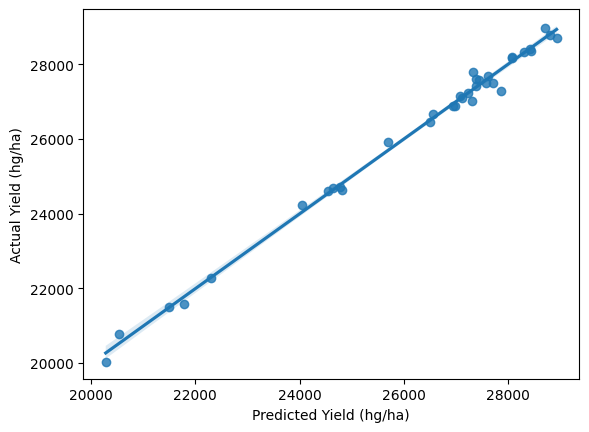

In [22]:
sns.regplot(x=y_pred_inv, y=y_true_inv)
plt.xlabel('Predicted Yield (hg/ha)')
plt.ylabel('Actual Yield (hg/ha)')
plt.show()

In [23]:
#  Step 1: Prepare the last time_steps data points from your original dataset
# last_data_points = scaled_data[-time_steps:]
last_data_points = scaled_data
print(last_data_points.shape)
future_yields = []

# def create_sequences(data, n_steps):
#     X, y = [], []
#     for i in range(len(data) - n_steps):
#         X.append(data[i:(i + n_steps),:])
#         y.append(data[i + n_steps,:1])
#     return np.array(X), np.array(y)

# time_steps = 4 # Define the number of time steps in the sequence
# sequence_data = scaled_data
# X, y = create_sequences(scaled_data, time_steps)
print("X.shape",X.shape)
print("Y.shape",y.shape)

last_data_points = X[-1]
print("last_data_points Shape:",last_data_points.shape)
future_yields = []

def finalize_lstm(unitsconv=64, unitslstm=128, unitsdense=16 , activate='selu'):    
    model2 = Sequential()
    model2.add(LSTM(unitsconv, activation=activate, input_shape=X.shape[1:], return_sequences=True))
    model2.add(GRU(unitslstm, activation=activate))
    model2.add(Flatten())
    model2.add(Dense(unitsdense,activation=activate))
    model2.add(Dense(1, activation='linear'))
    
    return model2

model = finalize_lstm()
model.compile(optimizer=keras.optimizers.Adamax(learning_rate=0.005), loss='mse', metrics=['mape'])
model.load_weights('Models/Model8_weights.hdf5')
model.summary()



(42, 22)
X.shape (35, 5, 22)
Y.shape (35, 1)
last_data_points Shape: (5, 22)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 5, 64)             22272     
                                                                 
 gru_1 (GRU)                 (None, 128)               74496     
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 98,849
Trainable params: 98,849
Non-trainable params: 0
_______________________________________

In [24]:
# Step 3: Forecast the yield for the future without having future X values
num_future_steps = 5
time_steps = 5

for i in range(num_future_steps):
    # Reshape the last_data_points to match the model's input shape
    print("LastDataPoints Shape:",last_data_points.shape)
    df_X = last_data_points[-time_steps:]
#     print(df_X)
    print("DF Shape:",df_X.shape)
    X_pred = df_X.reshape(1, time_steps, df_X.shape[1])
    print("X_pred shape:",X_pred.shape)

    # Use the trained model to make a prediction
    predicted_yield1 = model.predict(X_pred)
    pred = predicted_yield1[0, 0]
    print("pred shape:",pred.shape)

    # Inverse transform the predicted yield to get the original scale and extract the scalar value
    predicted_yield = scaler_Y.inverse_transform(predicted_yield1)[0, 0]
    future_yields.append(predicted_yield)
#     print(predicted_yield)
    print("InvTrans Shape:",predicted_yield.shape)

    # Append the predicted yield to the last_data_points for the next prediction
    last_data_points = np.append(last_data_points, [np.concatenate(([pred], df_X[-1, 1:]))], axis=0)
#     print(last_data_points[-time_steps:])
    print("NP Concat shape:",np.concatenate(([pred], df_X[-1, 1:])).shape)
    print("LastDataPoints:",last_data_points[-time_steps:].shape)

# Step 4: Inverse transform the entire forecasted data to get the original scale
forecasted_yield = scaler.inverse_transform(last_data_points)

print(last_data_points.shape)

# The forecasted_yield will contain the predicted yield values for the future time steps
# print("Forecasted Yields: ",np.round(future_yields))

print(forecasted_yield[-num_future_steps:,0])

LastDataPoints Shape: (5, 22)
DF Shape: (5, 22)
X_pred shape: (1, 5, 22)
1/1 [==============================] - 0s 157ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (5, 22)
LastDataPoints Shape: (6, 22)
DF Shape: (5, 22)
X_pred shape: (1, 5, 22)
1/1 [==============================] - 0s 14ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (5, 22)
LastDataPoints Shape: (7, 22)
DF Shape: (5, 22)
X_pred shape: (1, 5, 22)
1/1 [==============================] - 0s 13ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (5, 22)
LastDataPoints Shape: (8, 22)
DF Shape: (5, 22)
X_pred shape: (1, 5, 22)
1/1 [==============================] - 0s 12ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (5, 22)
LastDataPoints Shape: (9, 22)
DF Shape: (5, 22)
X_pred shape: (1, 5, 22)
1/1 [==============================] - 0s 12ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape:

In [28]:
scaled_new_y = scaler_Y.inverse_transform(new_y)
scaled_new_y

array([[28367.],
       [28368.]])

In [29]:
print(X.shape)
pred = model.predict(X)
scaled_pred = y_pred_inv
y1 = y_true_inv
diff = y1 - scaled_pred
diff

(35, 5, 22)
2/2 [==============================] - 0s 2ms/step


array([[ 192.80859375],
       [-204.984375  ],
       [ 251.49609375],
       [-258.16992188],
       [  65.36328125],
       [ -14.80078125],
       [ 213.53125   ],
       [-174.84375   ],
       [  84.38867188],
       [ -46.34375   ],
       [ 213.47460938],
       [-568.05859375],
       [   8.00195312],
       [ -38.78515625],
       [ 460.60742188],
       [ -34.2890625 ],
       [ -78.44921875],
       [  10.75195312],
       [ 269.22265625],
       [-282.5859375 ],
       [ -96.42578125],
       [  68.14257812],
       [ 105.48242188],
       [  -4.15625   ],
       [-200.90625   ],
       [  51.80078125],
       [ -56.76757812],
       [ 167.47265625],
       [  77.6015625 ],
       [ 128.46875   ],
       [-214.97265625],
       [ 122.29296875],
       [ -62.34570312],
       [   3.77539062],
       [  13.16210938]])

[datetime.date(2019, 12, 31) datetime.date(2020, 12, 31)
 datetime.date(2021, 12, 31) datetime.date(2022, 12, 31)
 datetime.date(2023, 12, 31)]
[24040, 21776, 20529, 20282, 24631, 21504, 25698, 24803, 24535, 26940, 27384, 27863, 27102, 26489, 27329, 22307, 24781, 28792, 28702, 27307, 26971, 27077, 26561, 27228, 27704, 27381, 27571, 27428, 27600, 28076, 28924, 28062, 28425, 28412, 28307]


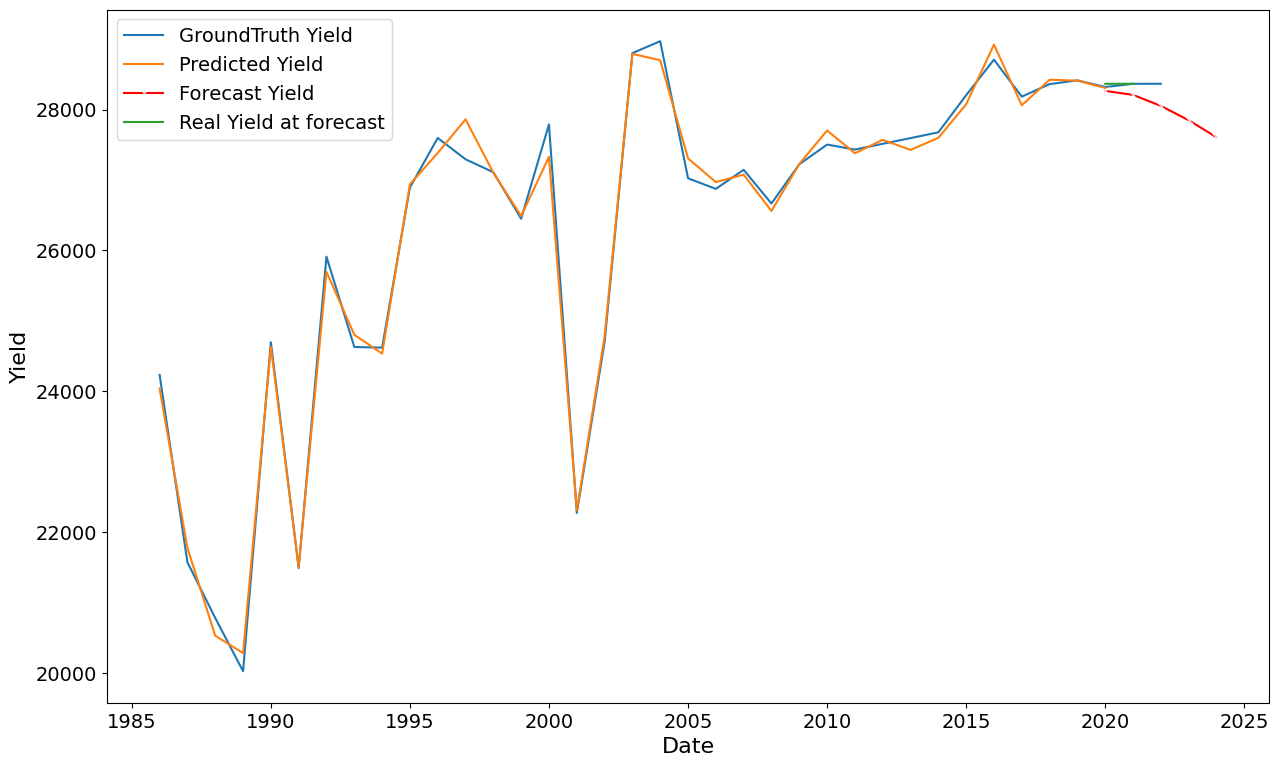

In [30]:
import matplotlib.pyplot as plt
date_range = pd.date_range(start='2019-12-31', periods=len(future_yields), freq='A-DEC')
date_range = date_range.date
print(date_range)

dataset = pd.read_csv("Monthly_dataset_1.csv")

new_data = pd.DataFrame({'date':date_range, 'Yield':future_yields})
existing_data =pd.DataFrame({'date':dataset['date'], 'Yield':dataset['Yield']})

appended_data = pd.concat([existing_data,new_data], ignore_index=True)

date_known = pd.to_datetime(dataset['date'][time_steps:])
y_predict = [int(i) for i in scaled_pred]
print(y_predict)
y_known = dataset['Yield'][time_steps:]
date_forecast = pd.to_datetime(date_range)
y_forecast = future_yields
y_actual_forecast = [int(i) for i in scaled_new_y]


# plt.figure(figsize=(15, 9))
# sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield",)  # Add markers to the GroundTruth line
# sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
# # sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
# plt.show()


plt.figure(figsize=(15, 9))
sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield")  # Add markers to the GroundTruth line
sns.lineplot(x=date_known[:-2], y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x', color='red')  # Add markers to the Forecast line
sns.lineplot(x=date_forecast[:2], y=y_actual_forecast, label="Real Yield at forecast", markers='x--')
plt.xlabel('Date', fontsize=16)  # Increase x-axis label font size
plt.ylabel('Yield', fontsize=16)  # Increase y-axis label font size
plt.xticks(fontsize=14)  # Increase x-axis tick label font size
plt.yticks(fontsize=14)  # Increase y-axis tick label font size
plt.legend(fontsize=14)  # Increase legend font size
# plt.grid()
# plt.show()
plt.savefig("Yield_Model5.png")

In [ ]:
from itertools import product

best_score = float('inf')
# # best_score = -9999
# best_hyperparameters = {}

# Step 3: Create a sequence of data by shifting the data by one time step.
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps),:])
        y.append(data[i + n_steps,:1])
    return np.array(X), np.array(y)

def create_model_lstm(x, y, unitsconv, unitslstm, unitsdense , activate, optime, lr, loss, batch, epoch):    
    # Model 1 - 5
#     model = keras.models.Sequential()
#     model.add(keras.layers.LSTM(unitslstm, activation=activate, input_shape=X.shape[1:]))
#    model.add(keras.layers.Dense(unitsdense,activation=activate))
#     model.add(keras.layers.Dense(1,activation='linear'))
#     model2 = model1(x , unitslstm, unitsdense, activate)
    
    # Model 6
    model2 = Sequential()
    model2.add(LSTM(unitslstm, activation=activate, input_shape=x.shape[1:], return_sequences=True))
    model2.add(GRU(unitsconv, activation=activate))
    model2.add(Flatten())
    model2.add(Dense(unitsdense,activation=activate))
    model2.add(Dense(1, activation='linear'))
    
    print("\n\n")
    model2.summary()
    print("\n")    
    def r2_Keras(y_true, y_pred):
        SS_res =  K.sum(K.square( y_true-y_pred ))
        SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
        return ( 1 - SS_res/(SS_tot + K.epsilon()) )
    
    model2.compile(optimizer = optime(lr), loss=loss, metrics=[r2_Keras, 'mape'])    
    
    batch = int(batch)
    epoch = int(epoch)
    callback = ModelCheckpoint(filepath='Models/checkpoint/Model9_checkpoint.hdf5',
                              monitor='r2_Keras', mode='max', save_best_only=True, save_weights_only=True,
                              verbose=False)
    
    history = model2.fit(x, y,
                       batch_size = batch,
                       epochs = epoch,
                       verbose = 0,
                        callbacks=[callback],
                       shuffle = False)
    
    return model2, history

# Define hyperparameter search space
# models = [model1(), model2(), model3()]
timesteps = [4, 5] #TimeSteps for Data
unitsconv_list = [16, 32, 64]
unitslstm_list = [32, 64, 128] # Number of LSTM Units
unitsdense_list = [16, 32, 64] # Number of Dense units
activate_list = ['relu', 'selu'] # Activation Function
batch_size_list = [4, 8, 16] # Batch Size
learning_rate_list = [0.005, 0.001, 0.0005, 0.0001,] # Learning Rate
optimizer_list = [keras.optimizers.Adamax, keras.optimizers.Adam] # Optimizer 
loss_list = ['mse'] # Loss Function
epoch_list = [50, 100, 120]

Full_list = product(timesteps, unitsconv_list, unitslstm_list, unitsdense_list, activate_list, batch_size_list, learning_rate_list, optimizer_list, loss_list, epoch_list)
print("Iterations :",len(list(Full_list)))
X_train, X_test, y_train, y_test = 0,0,0,0

# Iterate through all combinations of hyperparameters
for steps, convi, i, j, k, l, m, n, o, p in product(timesteps, unitsconv_list, unitslstm_list, unitsdense_list, activate_list, batch_size_list, learning_rate_list, optimizer_list, loss_list, epoch_list):
    X, y = create_sequences(scaled_data, steps)
    X_train = X[:-9]
    y_train = y[:-9]
    X_test = X[-9:]
    y_test = y[-9:]
    
    print(steps, convi, i, j, k, l, m, n, o, p)
    model3, history = create_model_lstm(x=X_train, y=y_train, unitsconv=convi, unitslstm=i, unitsdense=j, activate=k, batch=l, lr=m, optime=n, loss=o, epoch=p)    
    
    
    
    model3.load_weights("Models/checkpoint/Model9_checkpoint.hdf5")
    y_pred1 = model3.predict(X_test)
    y_pred2 = scaler_Y.inverse_transform(y_pred1.reshape(-1, 1))
    y_true1 = y_test
    y_true2 = scaler_Y.inverse_transform(y_true1.reshape(-1, 1))
    score = mean_absolute_percentage_error(y_pred=y_pred2, y_true=y_true2)
    print("Fit Complete for:", steps, convi, i, j, k, l, m, n, o, p)
    print("\n\nCurrent Score:", score)
    
    # Update best hyperparameters if the current score is better
    if score < best_score:
        best_score = score
        best_hyperparameters = {"TimeSteps":steps, "unitsconv":convi, 'unitslstm': i, 'unitsdense': j, 'activate': k, 'batch': l, 'Optimizer': n, 'learning_rate': m, 'lossFunction': o, 'Epochs':p}
        print("\n\nNew Best Score:", score, "Hyperparameters:", (steps, convi, i, j, k, l, m, n, o, p))
        model3.save('Models/Model9.hdf5')
        model3.save_weights("Models/Model9_weights.hdf5")

print("\n\nBest Hyperparameters:", best_hyperparameters)
print("Best Score:", best_score)


    Best Hyperparameters: {'TimeSteps': 5,
    'unitslstm': 64,
    'unitsdense': 64,
    'activate': 'relu',
    'batch': 16,
    'Optimizer': <class 'keras.optimizers.legacy.adamax.Adamax'>,
    'learning_rate': 0.0005, 'lossFunction': 'mse', 'Epochs': 120}
    Best Score: 0.0053880662259232735
    
    
    New Best Score: 0.0049161988386506456 Hyperparameters: (4, 32, 32, 'selu', 8, 0.005, <class 'keras.optimizers.legacy.adam.Adam'>, 'mse', 50)
    32 32 selu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100

In [16]:
X.shape

(37, 5, 22)

In [17]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps),:])
        y.append(data[i + n_steps,:1])
    return np.array(X), np.array(y)

X,y = create_sequences(scaled_data, 4)
print("X.shape:",X.shape)
print("y.shape:",y.shape)
X_train = X[:-9]
y_train = y[:-9]
X_test = X[-9:]
y_test = y[-9:]

def finalize_lstm(unitslstm, unitsdense , activate):    
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(unitslstm, activation=activate, input_shape=X.shape[1:]))
    model.add(keras.layers.Dense(unitsdense,activation=activate))
    model.add(keras.layers.Dense(1,activation='linear'))
    
    return model

model = finalize_lstm(unitslstm=32, unitsdense=32, activate='selu')
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss='mse', metrics=['mape'])
model.load_weights('Models/Model5_weights.hdf5')
model.summary()

X.shape: (38, 4, 22)
y.shape: (38, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                7040      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X, y, batch_size=8, shuffle=False, epochs=50)

Epoch 1/50
5/5 [==============================] - 1s 2ms/step - loss: 0.0971 - mape: 7124902.5000
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0680 - mape: 12641807.0000
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0197 - mape: 4337588.0000
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0355 - mape: 9862698.0000
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0233 - mape: 4159080.5000
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0224 - mape: 3836522.5000
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0198 - mape: 4611708.5000
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0194 - mape: 2103233.5000
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0185 - mape: 5149697.0000
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0166 - mape: 3222185.7500
Epoch 11/50
5/5 [=

In [19]:
y_pred = model.predict(X[:], batch_size=8)
y_pred_inv = scaler_Y.inverse_transform(y_pred)
y_pred_inv.shape

5/5 [==============================] - 0s 955us/step


(38, 1)

In [20]:
y_true = y[:]
y_true_inv = scaler_Y.inverse_transform(y_true)
y_true_inv.shape

(38, 1)

In [21]:
score = mean_absolute_percentage_error(y_pred=y_pred_inv,y_true=y_true_inv)
score

0.013458120672198811

In [22]:
score = r2_score(y_pred=y_pred_inv, y_true=y_true_inv)
score

0.968183062205816

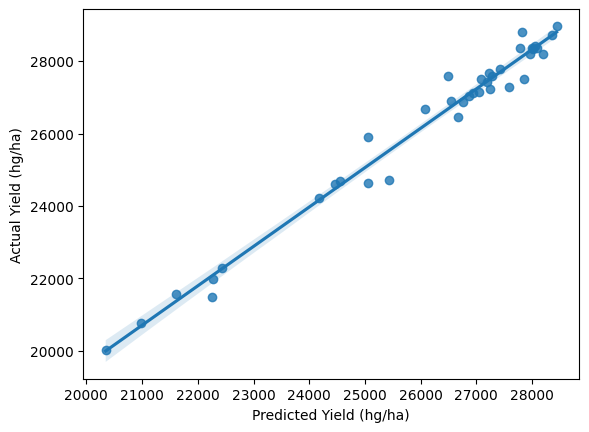

In [23]:
sns.regplot(x=y_pred_inv, y=y_true_inv)
plt.xlabel('Predicted Yield (hg/ha)')
plt.ylabel('Actual Yield (hg/ha)')
plt.show()

In [24]:
# Difference :

diff = y_true_inv - y_pred_inv
diff

array([[-269.87695312],
       [  51.72070312],
       [ -30.45117188],
       [-198.69140625],
       [-323.08789062],
       [ 153.265625  ],
       [-767.00585938],
       [ 858.10742188],
       [-433.703125  ],
       [ 156.90429688],
       [ 348.0625    ],
       [1115.40820312],
       [-283.73632812],
       [ 175.015625  ],
       [-220.25390625],
       [ 367.70703125],
       [-166.68554688],
       [-731.828125  ],
       [ 991.20703125],
       [ 531.77734375],
       [ 154.46875   ],
       [ 123.02734375],
       [  94.61523438],
       [ 585.92773438],
       [ -28.1640625 ],
       [ 429.71289062],
       [ 244.41992188],
       [-336.85742188],
       [ 323.99414062],
       [ 454.39453125],
       [   2.65234375],
       [ 344.64648438],
       [ 225.8046875 ],
       [ 281.92773438],
       [ 367.53125   ],
       [ 299.97265625],
       [ 587.09375   ],
       [ 376.29296875]])

#### Future Forecast

In [25]:
#  Step 1: Prepare the last time_steps data points from your original dataset
# last_data_points = scaled_data[-time_steps:]
last_data_points = scaled_data
print(last_data_points.shape)
future_yields = []

# def create_sequences(data, n_steps):
#     X, y = [], []
#     for i in range(len(data) - n_steps):
#         X.append(data[i:(i + n_steps),:])
#         y.append(data[i + n_steps,:1])
#     return np.array(X), np.array(y)

# time_steps = 4 # Define the number of time steps in the sequence
# sequence_data = scaled_data
# X, y = create_sequences(scaled_data, time_steps)
print("X.shape",X.shape)
print("Y.shape",y.shape)

last_data_points = X[-1]
print("last_data_points Shape:",last_data_points.shape)
future_yields = []

def finalize_lstm(unitslstm, unitsdense , activate):    
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(unitslstm, activation=activate, input_shape=X.shape[1:]))
    model.add(keras.layers.Dense(unitsdense,activation=activate))
    model.add(keras.layers.Dense(1,activation='linear'))
    
    return model

model = finalize_lstm(unitslstm=32, unitsdense=32, activate='selu')
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss='mse', metrics=['mape', r2_score])
model.load_weights('Models/Model5_weights.hdf5')
model.summary()



(42, 22)
X.shape (38, 4, 22)
Y.shape (38, 1)
last_data_points Shape: (4, 22)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                7040      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________


In [26]:
# # Step 2: Create a variable to store the number of future time steps you want to forecast
# num_future_steps = 3  # Change this according to your needs

# # Forecast future yields iteratively
# for _ in range(num_future_steps):
#     # Reshape the current_data to match the input shape of the model
#     current_data = current_data.reshape(1, time_steps, -1)
    
#     # Predict the next yield using the model
#     predicted_yield = model.predict(current_data)
    
#     # Append the predicted yield to the future_yields list
#     future_yields.append(predicted_yield[0, 0])
    
#     # Update current_data by removing the first time step and appending the predicted yield
#     current_data = np.concatenate((current_data[:, 1:, :], predicted_yield), axis=1)

# print("Predicted Future Yields:", future_yields)

In [27]:
# Step 3: Forecast the yield for the future without having future X values
num_future_steps = 5
time_steps = 4

for i in range(num_future_steps):
    # Reshape the last_data_points to match the model's input shape
    print("LastDataPoints Shape:",last_data_points.shape)
    df_X = last_data_points[-time_steps:]
#     print(df_X)
    print("DF Shape:",df_X.shape)
    X_pred = df_X.reshape(1, time_steps, df_X.shape[1])
    print("X_pred shape:",X_pred.shape)

    # Use the trained model to make a prediction
    predicted_yield1 = model.predict(X_pred)
    pred = predicted_yield1[0, 0]
    print("pred shape:",pred.shape)

    # Inverse transform the predicted yield to get the original scale and extract the scalar value
    predicted_yield = scaler_Y.inverse_transform(predicted_yield1)[0, 0]
    future_yields.append(predicted_yield)
#     print(predicted_yield)
    print("InvTrans Shape:",predicted_yield.shape)

    # Append the predicted yield to the last_data_points for the next prediction
    last_data_points = np.append(last_data_points, [np.concatenate(([pred], df_X[-1, 1:]))], axis=0)
#     print(last_data_points[-time_steps:])
    print("NP Concat shape:",np.concatenate(([pred], df_X[-1, 1:])).shape)
    print("LastDataPoints:",last_data_points[-time_steps:].shape)

# Step 4: Inverse transform the entire forecasted data to get the original scale
forecasted_yield = scaler.inverse_transform(last_data_points)

print(last_data_points.shape)

# The forecasted_yield will contain the predicted yield values for the future time steps
# print("Forecasted Yields: ",np.round(future_yields))

print(forecasted_yield[-num_future_steps:,0])

LastDataPoints Shape: (4, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 92ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (5, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 12ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (6, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 12ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (7, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 12ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (8, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 11ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: 

In [28]:
print(X.shape)
pred = model.predict(X)
scaled_pred = y_pred_inv
y1 = y_true_inv
diff = y1 - scaled_pred
diff

(38, 4, 22)
2/2 [==============================] - 0s 2ms/step


array([[-269.87695312],
       [  51.72070312],
       [ -30.45117188],
       [-198.69140625],
       [-323.08789062],
       [ 153.265625  ],
       [-767.00585938],
       [ 858.10742188],
       [-433.703125  ],
       [ 156.90429688],
       [ 348.0625    ],
       [1115.40820312],
       [-283.73632812],
       [ 175.015625  ],
       [-220.25390625],
       [ 367.70703125],
       [-166.68554688],
       [-731.828125  ],
       [ 991.20703125],
       [ 531.77734375],
       [ 154.46875   ],
       [ 123.02734375],
       [  94.61523438],
       [ 585.92773438],
       [ -28.1640625 ],
       [ 429.71289062],
       [ 244.41992188],
       [-336.85742188],
       [ 323.99414062],
       [ 454.39453125],
       [   2.65234375],
       [ 344.64648438],
       [ 225.8046875 ],
       [ 281.92773438],
       [ 367.53125   ],
       [ 299.97265625],
       [ 587.09375   ],
       [ 376.29296875]])

In [29]:
# import matplotlib.pyplot as plt
# date_range = pd.date_range(start='2022-12-31', periods=len(future_yields), freq='A-DEC')
# date_range = date_range.date
# print(date_range)

# dataset = pd.read_csv("Monthly_dataset_1.csv")

# new_data = pd.DataFrame({'date':date_range, 'Yield':future_yields})
# existing_data =pd.DataFrame({'date':dataset['date'], 'Yield':dataset['Yield']})

# appended_data = pd.concat([existing_data,new_data], ignore_index=True)

# date_known = pd.to_datetime(dataset['date'])[5:]
# y_predict = [int(i) for i in scaled_pred]
# print(y_predict)
# # y_known = dataset['Yield'][time_steps:]

# y_known = [int(i) for i in y1]
# print(y_known)
# date_forecast = pd.to_datetime(date_range)
# y_forecast = forecasted_yield[-num_future_steps:, 0]


# # plt.figure(figsize=(15, 9))
# # sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield",)  # Add markers to the GroundTruth line
# # sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
# # # sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
# # plt.show()


# plt.figure(figsize=(15, 9))
# sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield")  # Add markers to the GroundTruth line
# sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
# sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
# plt.xlabel('Date', fontsize=16)  # Increase x-axis label font size
# plt.ylabel('Yield', fontsize=16)  # Increase y-axis label font size
# plt.xticks(fontsize=14)  # Increase x-axis tick label font size
# plt.yticks(fontsize=14)  # Increase y-axis tick label font size
# plt.legend(fontsize=14)  # Increase legend font size
# plt.grid()
# plt.show()

[datetime.date(2022, 12, 31) datetime.date(2023, 12, 31)
 datetime.date(2024, 12, 31) datetime.date(2025, 12, 31)
 datetime.date(2026, 12, 31)]
[22264, 24181, 21602, 20979, 20347, 24543, 22257, 25053, 25062, 24463, 26545, 26482, 27578, 26935, 26671, 27422, 22439, 25434, 27811, 28440, 26870, 26751, 27051, 26081, 27252, 27074, 27188, 27851, 27272, 27223, 28202, 28365, 27959, 28081, 28048, 28021, 27779, 27991]


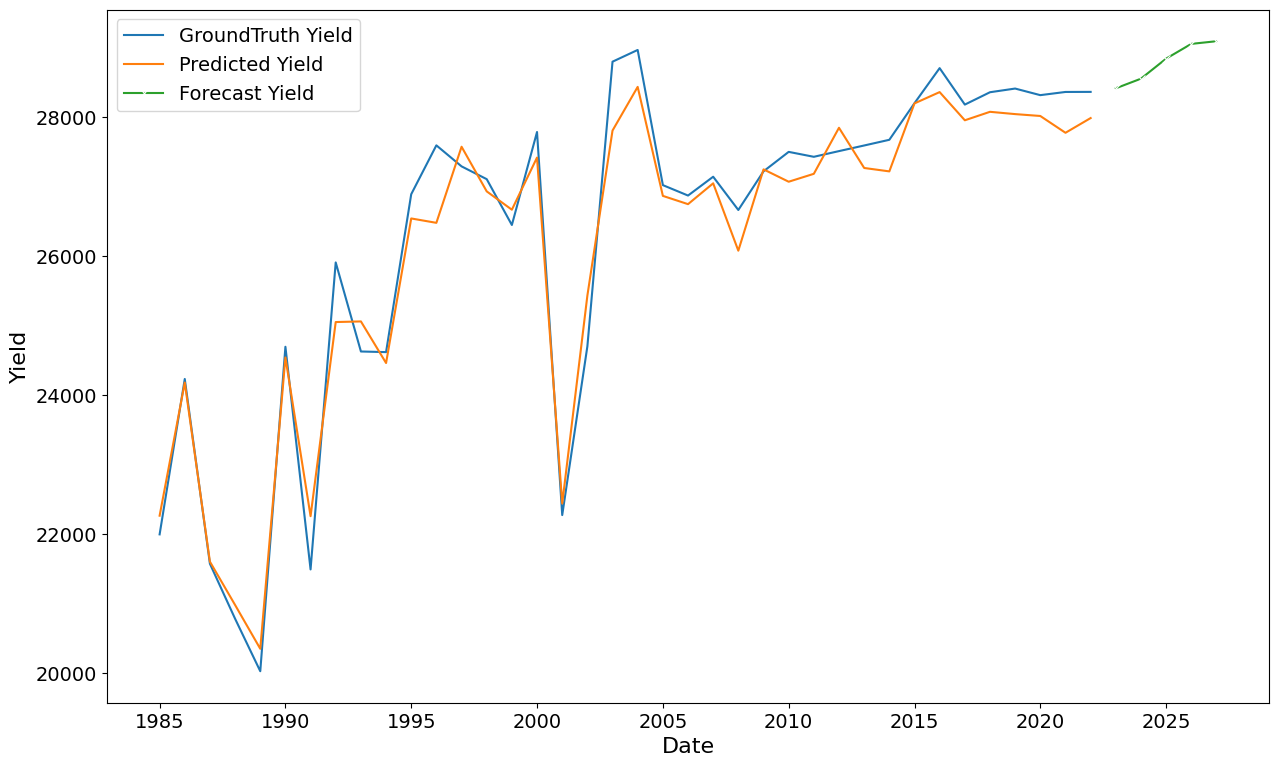

In [30]:
import matplotlib.pyplot as plt
date_range = pd.date_range(start='2022-12-31', periods=len(future_yields), freq='A-DEC')
date_range = date_range.date
print(date_range)

dataset = pd.read_csv("Monthly_dataset_1.csv")

new_data = pd.DataFrame({'date':date_range, 'Yield':future_yields})
existing_data =pd.DataFrame({'date':dataset['date'], 'Yield':dataset['Yield']})

appended_data = pd.concat([existing_data,new_data], ignore_index=True)

date_known = pd.to_datetime(dataset['date'][time_steps:])
y_predict = [int(i) for i in scaled_pred]
print(y_predict)
y_known = dataset['Yield'][time_steps:]
date_forecast = pd.to_datetime(date_range)
y_forecast = future_yields


# plt.figure(figsize=(15, 9))
# sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield",)  # Add markers to the GroundTruth line
# sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
# # sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
# plt.show()


plt.figure(figsize=(15, 9))
sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield")  # Add markers to the GroundTruth line
sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
plt.xlabel('Date', fontsize=16)  # Increase x-axis label font size
plt.ylabel('Yield', fontsize=16)  # Increase y-axis label font size
plt.xticks(fontsize=14)  # Increase x-axis tick label font size
plt.yticks(fontsize=14)  # Increase y-axis tick label font size
plt.legend(fontsize=14)  # Increase legend font size
# plt.grid()
plt.show()

In [43]:
model.save("Models/Final_model_overfit1.hdf5")
model.save_weights("Models/Final_modelWeights_overfit1.hdf5")

<Axes: xlabel='date', ylabel='Yield'>

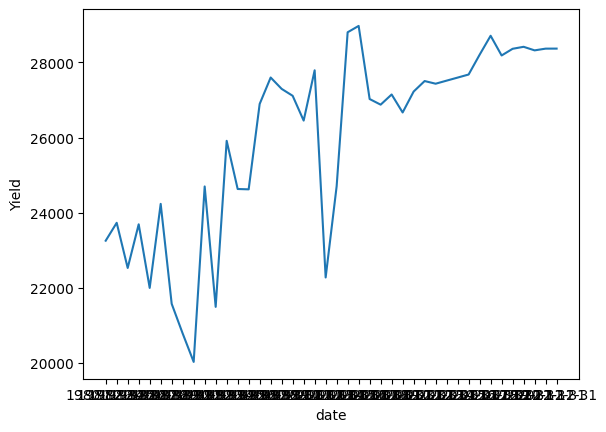

In [34]:
sns.lineplot(x=dataset['date'],y=dataset['Yield'])
sns.lineplot(x=dataset['date'])

In [45]:
y_pred_inv

array([[22264.877],
       [24181.28 ],
       [21602.451],
       [20979.691],
       [20347.088],
       [24543.734],
       [22257.006],
       [25053.893],
       [25062.703],
       [24463.096],
       [26545.938],
       [26482.592],
       [27578.736],
       [26935.984],
       [26671.254],
       [27422.293],
       [22439.686],
       [25434.828],
       [27811.793],
       [28440.223],
       [26870.531],
       [26751.973],
       [27051.385],
       [26081.072],
       [27252.164],
       [27074.287],
       [27188.58 ],
       [27851.857],
       [27272.006],
       [27223.605],
       [28202.348],
       [28365.354],
       [27959.195],
       [28081.072],
       [28048.469],
       [28021.027],
       [27779.906],
       [27991.707]], dtype=float32)

In [46]:
y_true_inv

array([[21995.],
       [24233.],
       [21572.],
       [20781.],
       [20024.],
       [24697.],
       [21490.],
       [25912.],
       [24629.],
       [24620.],
       [26894.],
       [27598.],
       [27295.],
       [27111.],
       [26451.],
       [27790.],
       [22273.],
       [24703.],
       [28803.],
       [28972.],
       [27025.],
       [26875.],
       [27146.],
       [26667.],
       [27224.],
       [27504.],
       [27433.],
       [27515.],
       [27596.],
       [27678.],
       [28205.],
       [28710.],
       [28185.],
       [28363.],
       [28416.],
       [28321.],
       [28367.],
       [28368.]])

In [47]:
date_known

4    1984-12-31
5    1985-12-31
6    1986-12-31
7    1987-12-31
8    1988-12-31
9    1989-12-31
10   1990-12-31
11   1991-12-31
12   1992-12-31
13   1993-12-31
14   1994-12-31
15   1995-12-31
16   1996-12-31
17   1997-12-31
18   1998-12-31
19   1999-12-31
20   2000-12-31
21   2001-12-31
22   2002-12-31
23   2003-12-31
24   2004-12-31
25   2005-12-31
26   2006-12-31
27   2007-12-31
28   2008-12-31
29   2009-12-31
30   2010-12-31
31   2011-12-31
32   2012-12-31
33   2013-12-31
34   2014-12-31
35   2015-12-31
36   2016-12-31
37   2017-12-31
38   2018-12-31
39   2019-12-31
40   2020-12-31
41   2021-12-31
Name: date, dtype: datetime64[ns]

In [51]:
datas = {'Date':list(date_known), 'Original Yield':list(y_true_inv[:,0]), 'Predicted Yield':list(y_pred_inv[:,0])}
dataframe = pd.DataFrame(datas)
dataframe

,Date,Original Yield,Predicted Yield
0,1984-12-31,21995.0,22264.876953
1,1985-12-31,24233.0,24181.279297
2,1986-12-31,21572.0,21602.451172
3,1987-12-31,20781.0,20979.691406
4,1988-12-31,20024.0,20347.087891
5,1989-12-31,24697.0,24543.734375
6,1990-12-31,21490.0,22257.005859
7,1991-12-31,25912.0,25053.892578
8,1992-12-31,24629.0,25062.703125
9,1993-12-31,24620.0,24463.095703


In [60]:

# Save the DataFrame to an Excel file
output_file = 'yield_predictions.xlsx'  # Change this to your desired file name
df.to_excel(output_file, index=False)

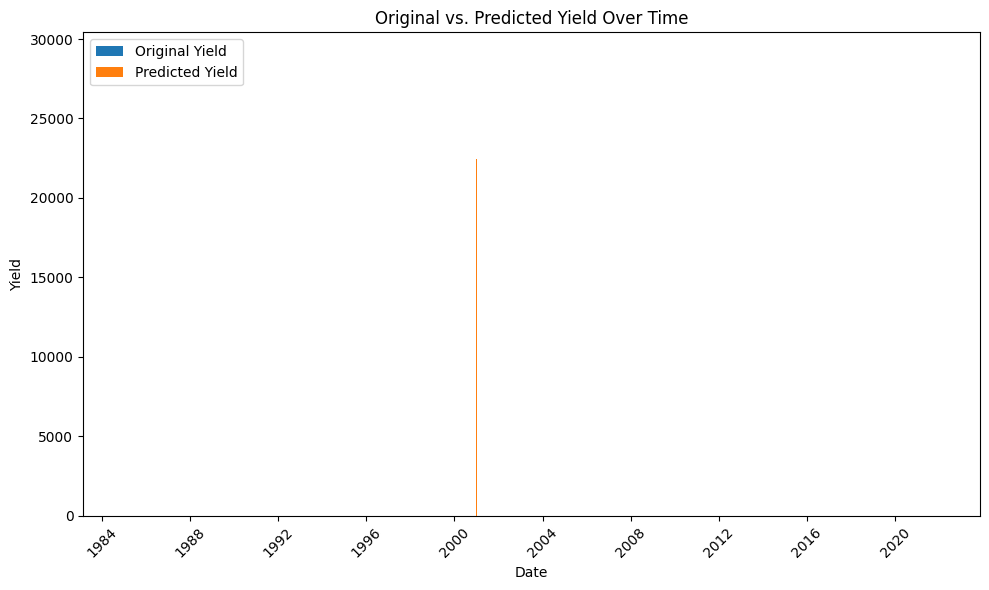

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'Date': ['1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31', '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31'],
    'Original Yield': [21995.0, 24233.0, 21572.0, 20781.0, 20024.0, 24697.0, 21490.0, 25912.0, 24629.0, 24620.0, 26894.0, 27598.0, 27295.0, 27111.0, 26451.0, 27790.0, 22273.0, 24703.0, 28803.0, 28972.0, 27025.0, 26875.0, 27146.0, 26667.0, 27224.0, 27504.0, 27433.0, 27515.0, 27596.0, 27678.0, 28205.0, 28710.0, 28185.0, 28363.0, 28416.0, 28321.0, 28367.0, 28368.0],
    'Predicted Yield': [22264.876953, 24181.279297, 21602.451172, 20979.691406, 20347.087891, 24543.734375, 22257.005859, 25053.892578, 25062.703125, 24463.095703, 26545.937500, 26482.591797, 27578.736328, 26935.984375, 26671.253906, 27422.292969, 22439.685547, 25434.828125, 27811.792969, 28440.222656, 26870.531250, 26751.972656, 27051.384766, 26081.072266, 27252.164062, 27074.287109, 27188.580078, 27851.857422, 27272.005859, 27223.605469, 28202.347656, 28365.353516, 27959.195312, 28081.072266, 28048.468750, 28021.027344, 27779.906250, 27991.707031]
}

df = pd.DataFrame(data)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Original Yield'], width=0.4, label='Original Yield')
plt.bar(df['Date'], df['Predicted Yield'], width=0.4, label='Predicted Yield')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.title('Original vs. Predicted Yield Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()